# 팀명 : 나혼자 산다.
- 조원 : 남석준, 황호준, 장정호, 김지연, 조주영

# 데이터 전처리 (EDA)

### 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cell2celltrain.csv')

In [3]:
import pandas as pd

# 모든 열을 출력할 수 있도록 설정
pd.set_option('display.max_columns', None)

In [4]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


### Churn labeling, CustomerID 제거

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Churn'] = label.fit_transform(df['Churn'])

In [6]:
df.drop(columns=['CustomerID'], inplace=True)

### 결측치/타겟 시각화

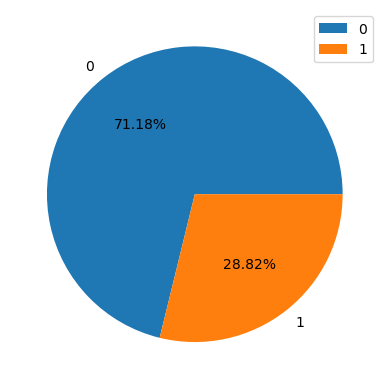

In [7]:
plt.pie(df['Churn'].value_counts(),
        labels=df['Churn'].value_counts().index,
        autopct='%.2f%%'
        )
plt.legend()
plt.show()

<Axes: >

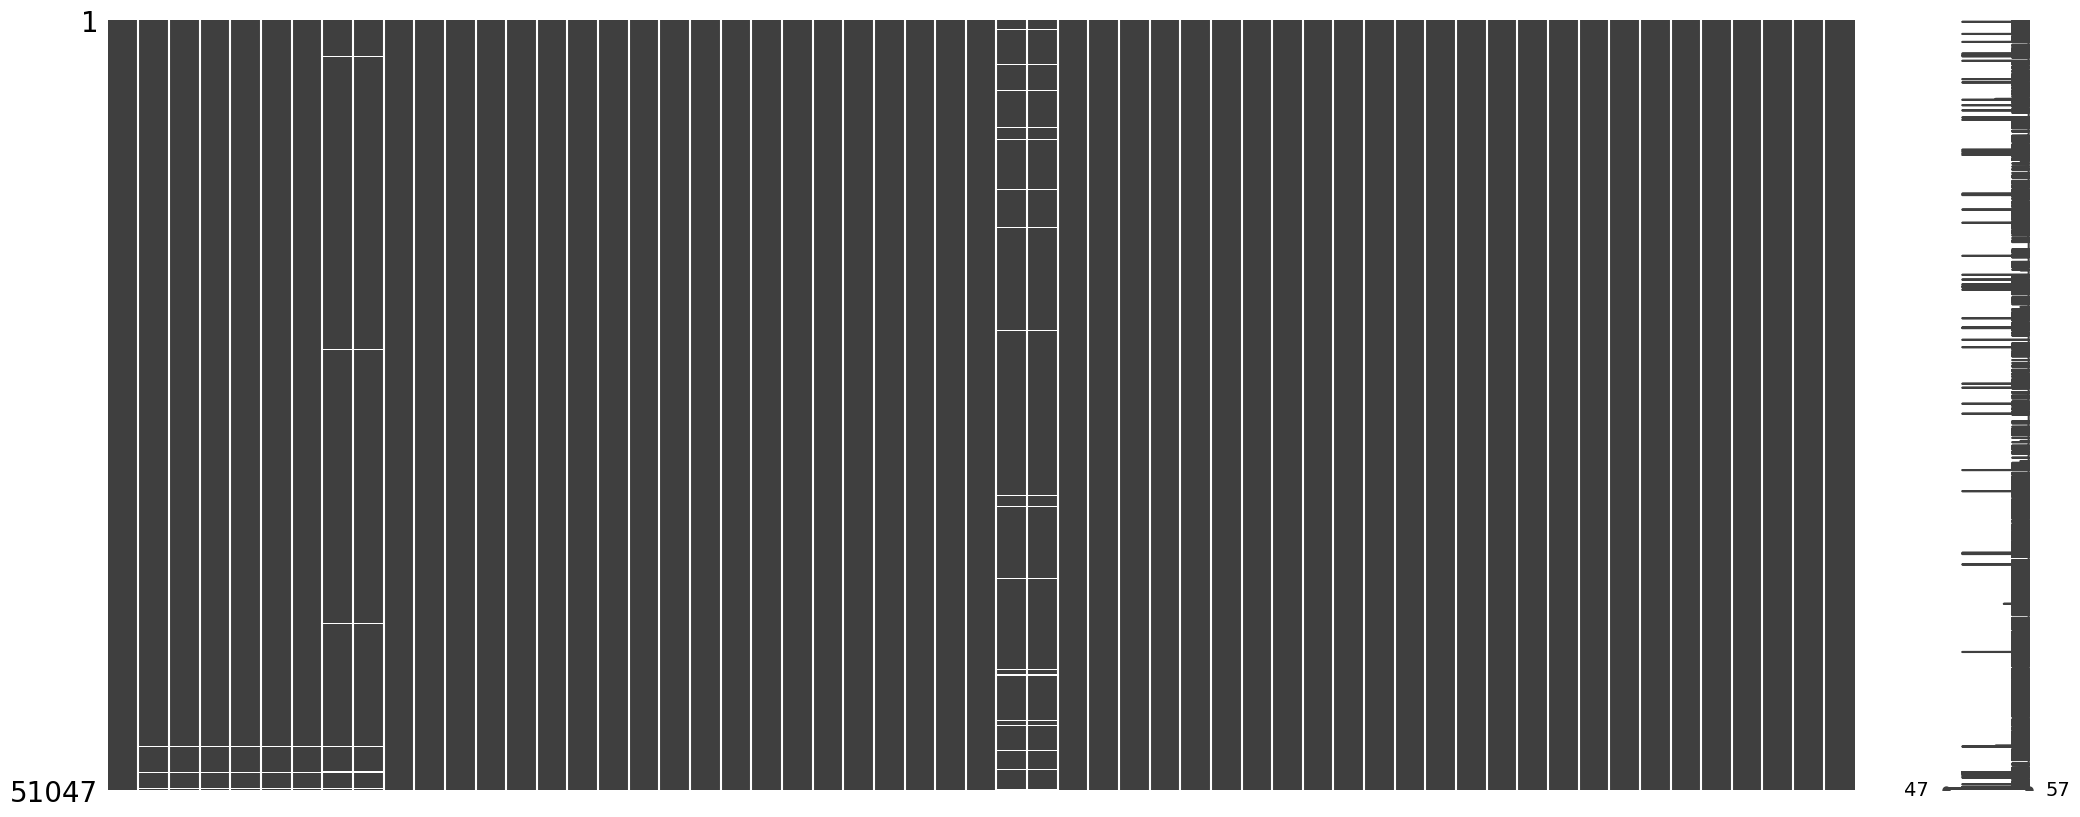

In [8]:
import missingno as msno
msno.matrix(df)

In [9]:
df.isna().sum().sum()

3515

In [10]:
df.isna().sum()[df.isna().sum() != 0]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

### 결측치 하나식 있는 컬럼 (Handsets,HandsetModels,CurrentEquipmentDays) -> 최빈값으로 대체

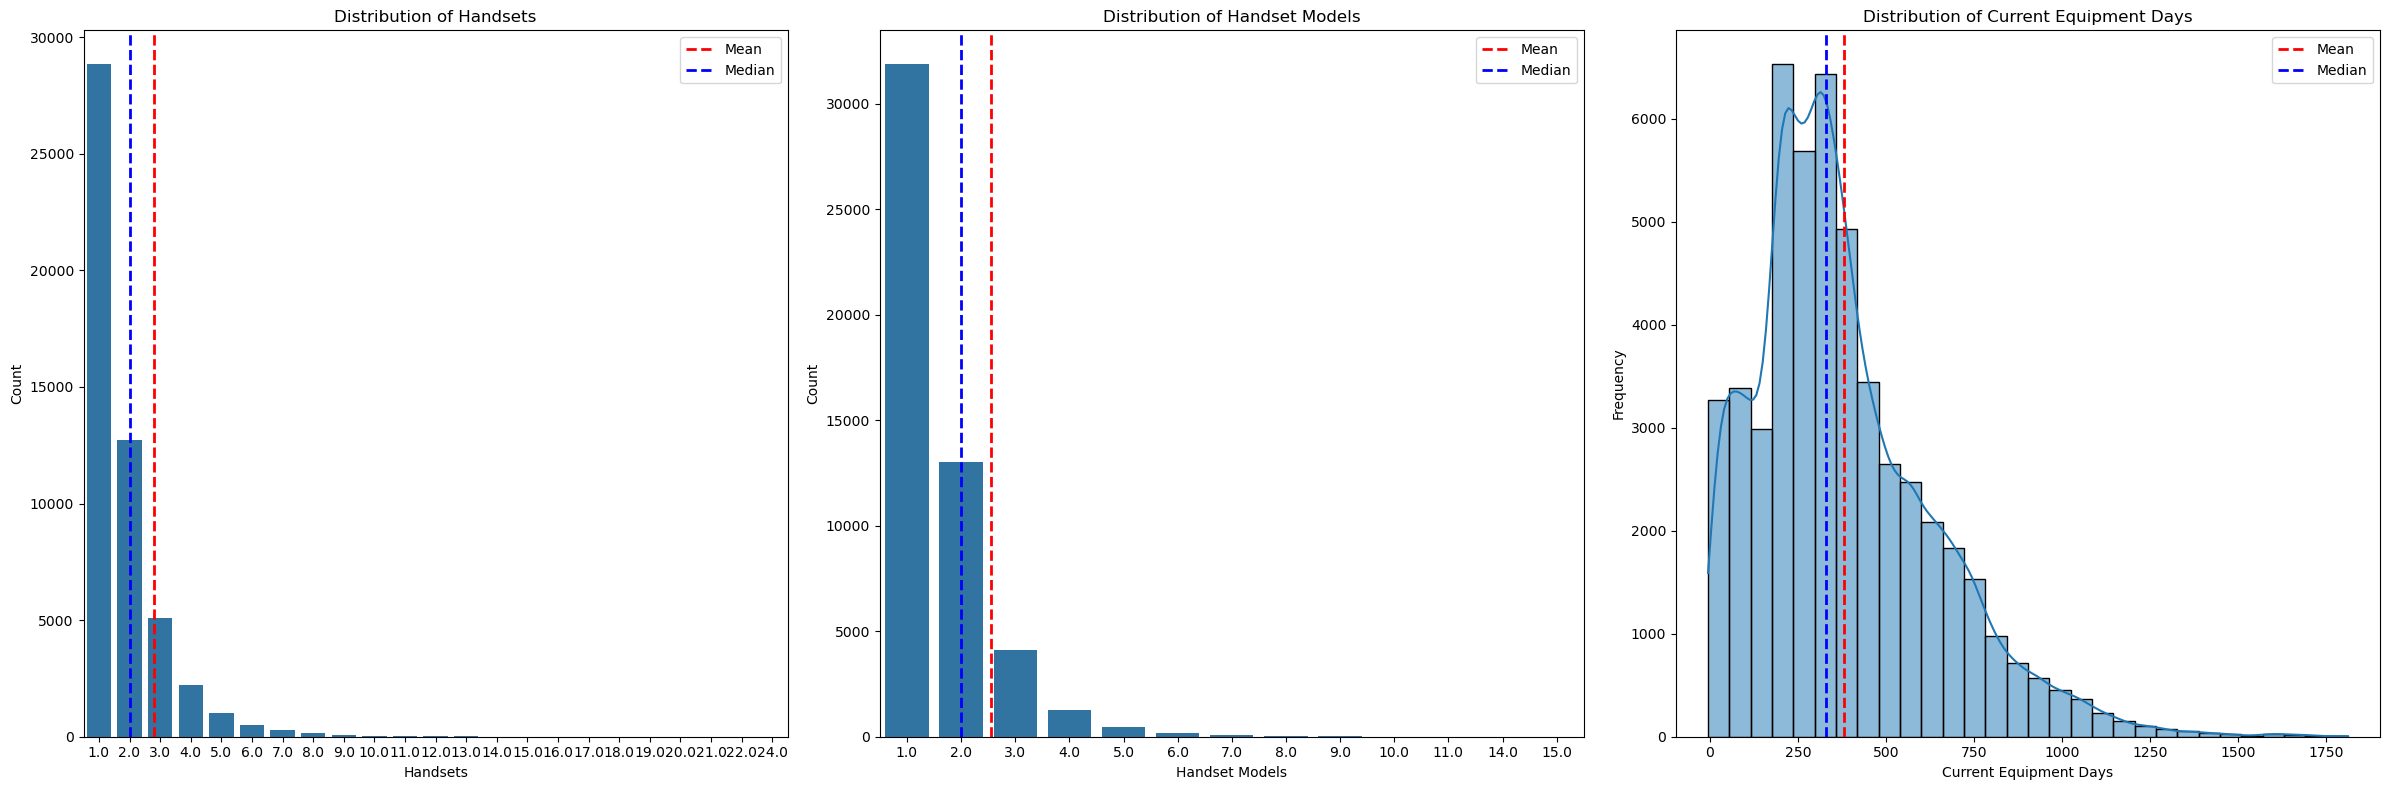

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure 생성 (3개의 서브플롯, 1행 3열)
plt.figure(figsize=(24, 8))  # Figure 크기를 키움

# 첫 번째 서브플롯 - Handsets
plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째 그래프
sns.countplot(x='Handsets', data=df)

# 평균과 중앙값 계산
mean_value = df['Handsets'].mean()
median_value = df['Handsets'].median()

# 평균과 중앙값 선 추가
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Handsets')
plt.xlabel('Handsets')
plt.ylabel('Count')
plt.legend()

# 두 번째 서브플롯 - HandsetModels
plt.subplot(1, 3, 2)  # 1행 3열 중 두 번째 그래프
sns.countplot(x='HandsetModels', data=df)

# 평균과 중앙값 계산
mean_value = df['HandsetModels'].mean()
median_value = df['HandsetModels'].median()

# 평균과 중앙값 선 추가
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Handset Models')
plt.xlabel('Handset Models')
plt.ylabel('Count')
plt.legend()

# 세 번째 서브플롯 - CurrentEquipmentDays
plt.subplot(1, 3, 3)  # 1행 3열 중 세 번째 그래프
sns.histplot(df['CurrentEquipmentDays'], bins=30, kde=True)

# 평균과 중앙값 계산
mean_value = df['CurrentEquipmentDays'].mean()
median_value = df['CurrentEquipmentDays'].median()

# 평균과 중앙값 선 추가
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')

plt.title('Distribution of Current Equipment Days')
plt.xlabel('Current Equipment Days')
plt.ylabel('Frequency')
plt.legend()

# 전체 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


In [12]:
# 각 컬럼의 최빈값 구하기
mode_handsets = df['Handsets'].mode()[0]
mode_handsetmodels = df['HandsetModels'].mode()[0]
mode_currentequipmentdays = df['CurrentEquipmentDays'].mode()[0]

# 결측치 최빈값으로 채우기 (권장 방식)
df = df.fillna({
    'Handsets': mode_handsets,
    'HandsetModels': mode_handsetmodels,
    'CurrentEquipmentDays': mode_currentequipmentdays
})

# 결측치 처리 후 결과 확인
print(df[['Handsets', 'HandsetModels', 'CurrentEquipmentDays']].isnull().sum())


Handsets                0
HandsetModels           0
CurrentEquipmentDays    0
dtype: int64


In [13]:
df.isna().sum()[df.isna().sum() != 0]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
AgeHH1                   909
AgeHH2                   909
dtype: int64

### AgeHH1, AgeHH2 삭제
 - 0으로 채워진 컬럼이 많음. -> 컬럼삭제

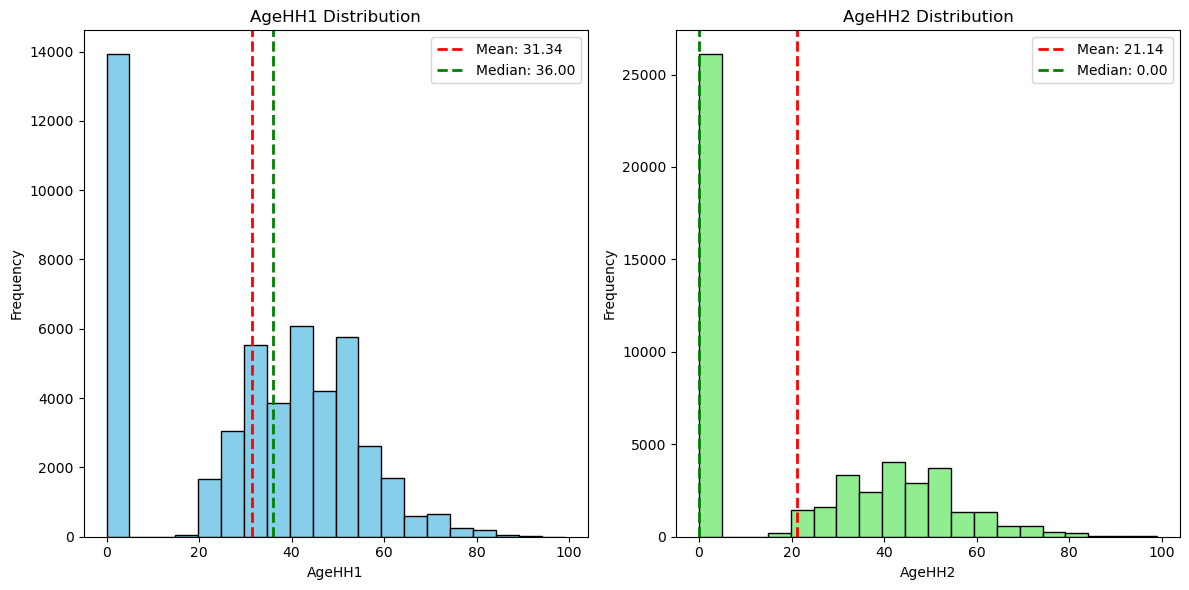

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드
# df = pd.read_csv('your_data.csv') # 이미 df가 있다고 가정합니다

# AgeHH1과 AgeHH2 컬럼의 평균값과 중앙값 계산
mean_agehh1 = df['AgeHH1'].mean()
median_agehh1 = df['AgeHH1'].median()

mean_agehh2 = df['AgeHH2'].mean()
median_agehh2 = df['AgeHH2'].median()

# 히스토그램 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# AgeHH1 히스토그램
ax1.hist(df['AgeHH1'].dropna(), bins=20, color='skyblue', edgecolor='black')
ax1.axvline(mean_agehh1, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_agehh1:.2f}')
ax1.axvline(median_agehh1, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_agehh1:.2f}')
ax1.set_title('AgeHH1 Distribution')
ax1.set_xlabel('AgeHH1')
ax1.set_ylabel('Frequency')
ax1.legend()

# AgeHH2 히스토그램
ax2.hist(df['AgeHH2'].dropna(), bins=20, color='lightgreen', edgecolor='black')
ax2.axvline(mean_agehh2, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_agehh2:.2f}')
ax2.axvline(median_agehh2, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_agehh2:.2f}')
ax2.set_title('AgeHH2 Distribution')
ax2.set_xlabel('AgeHH2')
ax2.set_ylabel('Frequency')
ax2.legend()

# 그래프 간 간격 조정 및 출력
plt.tight_layout()
plt.show()


In [15]:
df['AgeHH1'].value_counts()

AgeHH1
0.0     13917
46.0     2149
42.0     2074
50.0     2063
48.0     2055
44.0     2037
40.0     1979
52.0     1968
38.0     1967
36.0     1889
30.0     1875
32.0     1826
34.0     1823
54.0     1719
28.0     1657
26.0     1392
56.0     1382
58.0     1237
24.0      859
60.0      811
22.0      543
62.0      476
64.0      402
66.0      308
68.0      281
20.0      261
70.0      248
72.0      227
74.0      167
76.0      137
78.0      102
80.0       81
82.0       57
18.0       44
84.0       44
86.0       29
88.0       23
90.0       12
94.0        7
92.0        6
98.0        2
99.0        1
96.0        1
Name: count, dtype: int64

In [16]:
print(f"{(len(df[df['AgeHH1'] == 0]) / len(df) * 100):.2f}%")


27.26%


In [17]:
df['AgeHH2'].value_counts()

AgeHH2
0.0     26087
46.0     1487
48.0     1419
44.0     1411
50.0     1335
42.0     1330
52.0     1295
40.0     1292
38.0     1218
36.0     1193
34.0     1131
32.0     1120
30.0     1081
54.0     1075
28.0      896
56.0      737
26.0      729
24.0      655
58.0      590
60.0      525
62.0      447
22.0      445
64.0      366
20.0      351
66.0      313
68.0      269
70.0      227
72.0      188
18.0      179
74.0      169
76.0      127
78.0      119
80.0      107
82.0       58
86.0       37
84.0       34
90.0       29
88.0       27
96.0       11
98.0       10
94.0       10
92.0        8
99.0        1
Name: count, dtype: int64

In [18]:
print(f"{(len(df[df['AgeHH2'] == 0]) / len(df) * 100):.2f}%")


51.10%


In [19]:
df.drop(columns=['AgeHH1','AgeHH2'], inplace=True)

In [20]:
df.isna().sum()[df.isna().sum() != 0]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
dtype: int64

### CreditRating 
- 데이터값 : ( '1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low','7-Lowest') 의미를 있는 서열을 가짐 -> Ordinary encoder

In [21]:
df['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [22]:
df['CreditRating'] = df['CreditRating'].str.extract('(\\d+)')
df['CreditRating'] = df['CreditRating'].astype(int)

In [23]:
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1,Suburban,Professional,No
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4,Suburban,Professional,Yes
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3,Town,Crafts,Yes
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4,Other,Other,No
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1,Suburban,Other,Yes
51043,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3,Other,Other,No
51044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5,Other,Clerical,No
51045,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5,Other,Other,No


### HandsetPrice, MaritalStatus 
- Unknown 값 많음 -> 컬럼삭제

In [24]:
df['HandsetPrice'].value_counts()

HandsetPrice
Unknown    28982
30          7328
150         4115
130         2105
80          1960
10          1928
60          1776
200         1266
100         1235
40           249
400           46
250           20
300           13
180           10
500            8
240            6
Name: count, dtype: int64

In [25]:
df.drop(columns=['HandsetPrice'], inplace=True)

In [26]:
df['MaritalStatus'].value_counts()

MaritalStatus
Unknown    19700
Yes        18651
No         12696
Name: count, dtype: int64

In [27]:
df.drop(columns=['MaritalStatus'], inplace=True)

### Service area mapping

In [28]:
import numpy as np

In [8]:
mynp = df['ServiceArea'].unique()
mynp

array(['SEAPOR503', 'PITHOM412', 'MILMIL414', 'OKCTUL918', 'OKCOKC405',
       'SANMCA210', 'SLCSLC801', 'LOULOU502', 'KCYKCK913', 'KCYNEW316',
       'KCYKCM816', 'DENDEN303', 'PHICTR610', 'OKCLRK501', 'OMADES515',
       'SANAUS512', 'KCYWIC316', 'INDIND317', 'SLCPRO801', 'OMALNC402',
       'NSHNSH615', 'OMAOMA402', 'PHXTUC520', 'DALDAL214', 'DALDTN940',
       'DALFTW817', 'SANSAN210', 'NYCMAN917', 'NOLKEN504', 'MINMIN612',
       'NNYROC716', 'PHIARD610', 'NYCQUE917', 'DENBOU303', 'BOSBOS617',
       'PHXPHX602', 'NNYBUF716', 'DETTOL419', 'NNYSYR315', 'STLSTL314',
       'PHIPHI215', 'SEABLV425', 'MIAMIA305', 'PHICHC215', 'SEASEA206',
       'BIRBIR205', 'MIADFD954', 'LOUNAL812', 'MIADEL561', 'MIAFTL954',
       'SEASPO509', 'SEATAC253', 'SFRSAC916', 'MIANDA305', 'MINSTP612',
       'MIAHWD954', 'NYCBRO917', 'PHIJEN215', 'OMACDR319', 'MIAWPB561',
       'SEAOLY360', 'PITBUT412', 'SEAEVE425', 'PHIMER609', 'SEACDA208',
       'HARHAR860', 'SFRSFR415', 'SFROAK510', 'SFRSCL408', 'NNYA

C:\Users\USER\AppData\Local\Temp\ipykernel_3864\392384305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ServiceArea', data=df, palette='coolwarm')


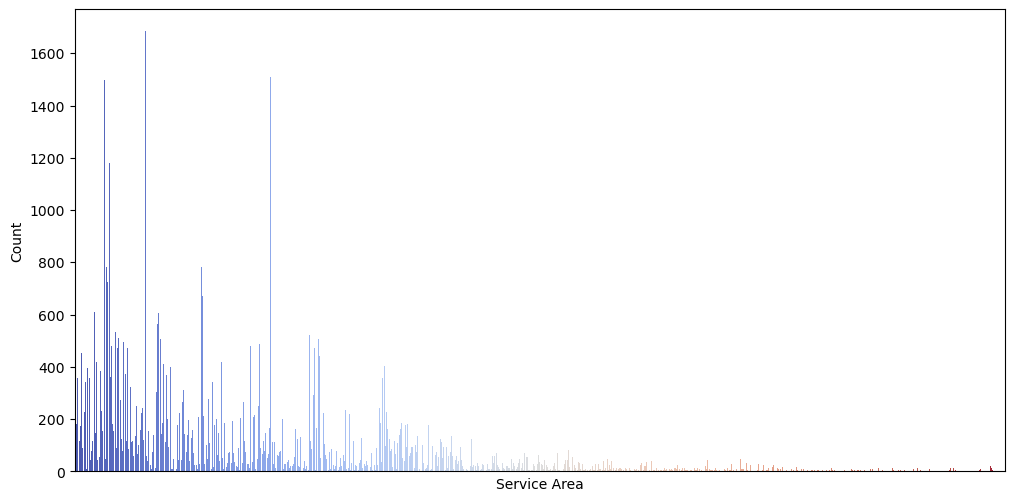

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯
plt.figure(figsize=(12, 6))
sns.countplot(x='ServiceArea', data=df, palette='coolwarm')
# plt.title('Count Plot of ServiceArea')
plt.xlabel('Service Area')
plt.ylabel('Count')
plt.xticks([])  # x축 레이블을 회전하여 가독성 향상
plt.show()


In [30]:
mynp = df['ServiceArea'].unique()
mynp

array(['SEAPOR503', 'PITHOM412', 'MILMIL414', 'OKCTUL918', 'OKCOKC405',
       'SANMCA210', 'SLCSLC801', 'LOULOU502', 'KCYKCK913', 'KCYNEW316',
       'KCYKCM816', 'DENDEN303', 'PHICTR610', 'OKCLRK501', 'OMADES515',
       'SANAUS512', 'KCYWIC316', 'INDIND317', 'SLCPRO801', 'OMALNC402',
       'NSHNSH615', 'OMAOMA402', 'PHXTUC520', 'DALDAL214', 'DALDTN940',
       'DALFTW817', 'SANSAN210', 'NYCMAN917', 'NOLKEN504', 'MINMIN612',
       'NNYROC716', 'PHIARD610', 'NYCQUE917', 'DENBOU303', 'BOSBOS617',
       'PHXPHX602', 'NNYBUF716', 'DETTOL419', 'NNYSYR315', 'STLSTL314',
       'PHIPHI215', 'SEABLV425', 'MIAMIA305', 'PHICHC215', 'SEASEA206',
       'BIRBIR205', 'MIADFD954', 'LOUNAL812', 'MIADEL561', 'MIAFTL954',
       'SEASPO509', 'SEATAC253', 'SFRSAC916', 'MIANDA305', 'MINSTP612',
       'MIAHWD954', 'NYCBRO917', 'PHIJEN215', 'OMACDR319', 'MIAWPB561',
       'SEAOLY360', 'PITBUT412', 'SEAEVE425', 'PHIMER609', 'SEACDA208',
       'HARHAR860', 'SFRSFR415', 'SFROAK510', 'SFRSCL408', 'NNYA

In [10]:
import numpy as np

In [11]:
codes_only = np.array([code[:3] for code in mynp if not pd.isna(code)])


In [12]:
codes_only

array(['SEA', 'PIT', 'MIL', 'OKC', 'OKC', 'SAN', 'SLC', 'LOU', 'KCY',
       'KCY', 'KCY', 'DEN', 'PHI', 'OKC', 'OMA', 'SAN', 'KCY', 'IND',
       'SLC', 'OMA', 'NSH', 'OMA', 'PHX', 'DAL', 'DAL', 'DAL', 'SAN',
       'NYC', 'NOL', 'MIN', 'NNY', 'PHI', 'NYC', 'DEN', 'BOS', 'PHX',
       'NNY', 'DET', 'NNY', 'STL', 'PHI', 'SEA', 'MIA', 'PHI', 'SEA',
       'BIR', 'MIA', 'LOU', 'MIA', 'MIA', 'SEA', 'SEA', 'SFR', 'MIA',
       'MIN', 'MIA', 'NYC', 'PHI', 'OMA', 'MIA', 'SEA', 'PIT', 'SEA',
       'PHI', 'SEA', 'HAR', 'SFR', 'SFR', 'SFR', 'NNY', 'STL', 'NYC',
       'SFR', 'DET', 'DET', 'NYC', 'NYC', 'NSH', 'PIT', 'SEA', 'NYC',
       'MIA', 'HAR', 'SAN', 'SFR', 'PHI', 'NYC', 'DET', 'BOS', 'SAN',
       'DET', 'BOS', 'PHI', 'DET', 'SFR', 'PHI', 'SLC', 'PIT', 'OKC',
       'BOS', 'SEA', 'APC', 'APC', 'SAN', 'SEA', 'LOU', 'HAR', 'NYC',
       'PHI', 'DAL', 'APC', 'PIT', 'HAR', 'SFR', 'SFR', 'MIA', 'OMA',
       'APC', 'BOS', 'MIA', 'NYC', 'DAL', 'LOU', 'MIA', 'DEN', 'DET',
       'BOS', 'MIA',

In [14]:
np.unique(codes_only)

array(['AIR', 'APC', 'ATH', 'ATL', 'AWI', 'BIR', 'BOS', 'CHI', 'DAL',
       'DEN', 'DET', 'FLN', 'GCW', 'HAR', 'HOP', 'HOU', 'HWI', 'IND',
       'INH', 'INU', 'IPM', 'KCY', 'LAU', 'LAW', 'LAX', 'LOU', 'MIA',
       'MIL', 'MIN', 'NCR', 'NEV', 'NMC', 'NMX', 'NNY', 'NOL', 'NOR',
       'NSH', 'NVU', 'NYC', 'OHH', 'OHI', 'OKC', 'OMA', 'PHI', 'PHX',
       'PIT', 'SAN', 'SDA', 'SEA', 'SEW', 'SFR', 'SFU', 'SHE', 'SLC',
       'SLU', 'STL', 'VAH'], dtype='<U3')

In [15]:
len(np.unique(codes_only))

57

In [33]:
# 값을 키로 대체하는 함수 정의
# def replace_with_region(value):
#     for key, region_values in region_dict.items():
#         if value in region_values:
#             return key
#     return value  # 값이 region_dict에 없으면 그대로 반환

C:\Users\USER\AppData\Local\Temp\ipykernel_3864\4211134269.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ServiceArea', data=df, palette='coolwarm')


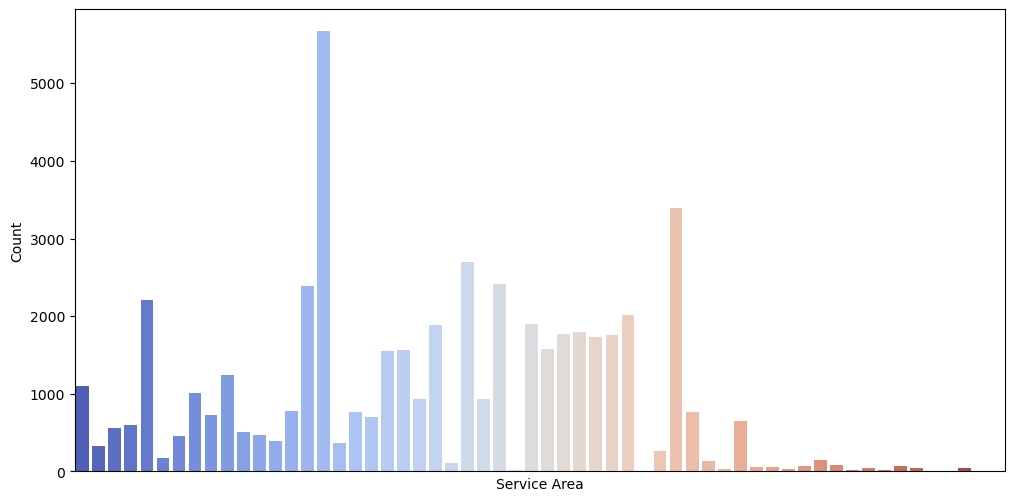

In [34]:
#ServiceArea 에 앞에 지역코드 3개만 남기고제거, 결측값은 제 4의 카테고리 Q로 지정
df['ServiceArea'] = df['ServiceArea'].apply(lambda x: x[:3] if pd.notna(x) else 'Q' )


import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯
plt.figure(figsize=(12, 6))
sns.countplot(x='ServiceArea', data=df, palette='coolwarm')
# plt.title('Count Plot of ServiceArea')
plt.xlabel('Service Area')
plt.ylabel('Count')
plt.xticks([]) 
plt.show()

In [35]:
mynp_unique = np.unique(codes_only)
mynp_unique

array(['AIR', 'APC', 'ATH', 'ATL', 'AWI', 'BIR', 'BOS', 'CHI', 'DAL',
       'DEN', 'DET', 'FLN', 'GCW', 'HAR', 'HOP', 'HOU', 'HWI', 'IND',
       'INH', 'INU', 'IPM', 'KCY', 'LAU', 'LAW', 'LAX', 'LOU', 'MIA',
       'MIL', 'MIN', 'NCR', 'NEV', 'NMC', 'NMX', 'NNY', 'NOL', 'NOR',
       'NSH', 'NVU', 'NYC', 'OHH', 'OHI', 'OKC', 'OMA', 'PHI', 'PHX',
       'PIT', 'SAN', 'SDA', 'SEA', 'SEW', 'SFR', 'SFU', 'SHE', 'SLC',
       'SLU', 'STL', 'VAH'], dtype='<U3')

In [36]:
len(mynp_unique)

57

In [37]:
# 동부, 서부, 중부로 코드를 분류하여 딕셔너리 생성
region_dict = {
    'East': ['BOS', 'PHI', 'NYC', 'PIT', 'MIA', 'ATL', 'HAR', 'NSH', 'NCR', 'NNY'],
    'Central': ['CHI', 'DET', 'STL', 'DAL', 'HOU', 'KCY', 'OMA', 'IND', 'INH', 'IPM', 'AWI', 'FLN', 'OHI', 'OHH'],
    'West': ['LAX', 'SFR', 'SEA', 'SAN', 'PHX', 'DEN', 'SLC', 'LAU', 'NEV', 'NMC', 'NMX', 'NVU', 'HWI', 'SHE', 'SDA', 'SEW', 'SFU', 'SLU']
}

# 결과 출력
len(region_dict['East']) + len(region_dict['Central']) + len(region_dict['West']) 

42

In [ ]:
# 값을 키로 대체하는 함수 정의
def replace_with_region(value):
    for key, region_values in region_dict.items():
        if value in region_values:
            return key
    return value  # 값이 region_dict에 없으면 그대로 반환

In [38]:
mynp_unique = [ i for i in mynp_unique if i not in region_dict['East']]
mynp_unique = [ i for i in mynp_unique if i not in region_dict['Central']]
mynp_unique = [ i for i in mynp_unique if i not in region_dict['West']]

In [39]:
print(mynp_unique)
print(len(mynp_unique))

['AIR', 'APC', 'ATH', 'BIR', 'GCW', 'HOP', 'INU', 'LAW', 'LOU', 'MIL', 'MIN', 'NOL', 'NOR', 'OKC', 'VAH']
15


In [40]:
region_dict['Q'] = mynp_unique

In [41]:
region_dict['Q']

['AIR',
 'APC',
 'ATH',
 'BIR',
 'GCW',
 'HOP',
 'INU',
 'LAW',
 'LOU',
 'MIL',
 'MIN',
 'NOL',
 'NOR',
 'OKC',
 'VAH']

In [42]:
df['ServiceArea'].isna().sum()

0

In [44]:
# 값을 키로 대체하는 함수 정의
def replace_with_region(value):
    for key, region_values in region_dict.items():
        if value in region_values:
            return key
    return value  # 값이 region_dict에 없으면 그대로 반환

In [45]:
df['ServiceArea'] = df['ServiceArea'].apply(replace_with_region)


C:\Users\USER\AppData\Local\Temp\ipykernel_3864\267983063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ServiceArea', data=df, palette='coolwarm')


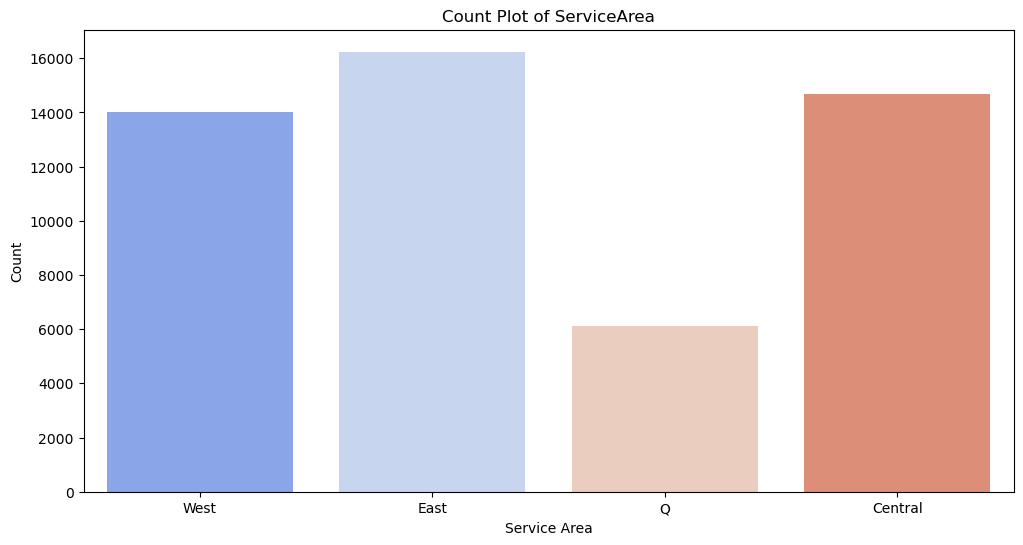

In [46]:

# 카운트플롯
plt.figure(figsize=(12, 6))
sns.countplot(x='ServiceArea', data=df, palette='coolwarm')
plt.title('Count Plot of ServiceArea')
plt.xlabel('Service Area')
plt.ylabel('Count')
# plt.xticks([])  # x축 레이블을 회전하여 가독성 향상
plt.show()

In [47]:
df['ServiceArea'].isna().sum()

0

### float type 히스토그램 시각화
    - 중앙값으로

In [48]:
df.isna().sum() [df.isna().sum() > 1]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
dtype: int64

In [49]:
nam = df.isna().sum() [df.isna().sum() > 1]

In [50]:
nam[:-2].index

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes'],
      dtype='object')

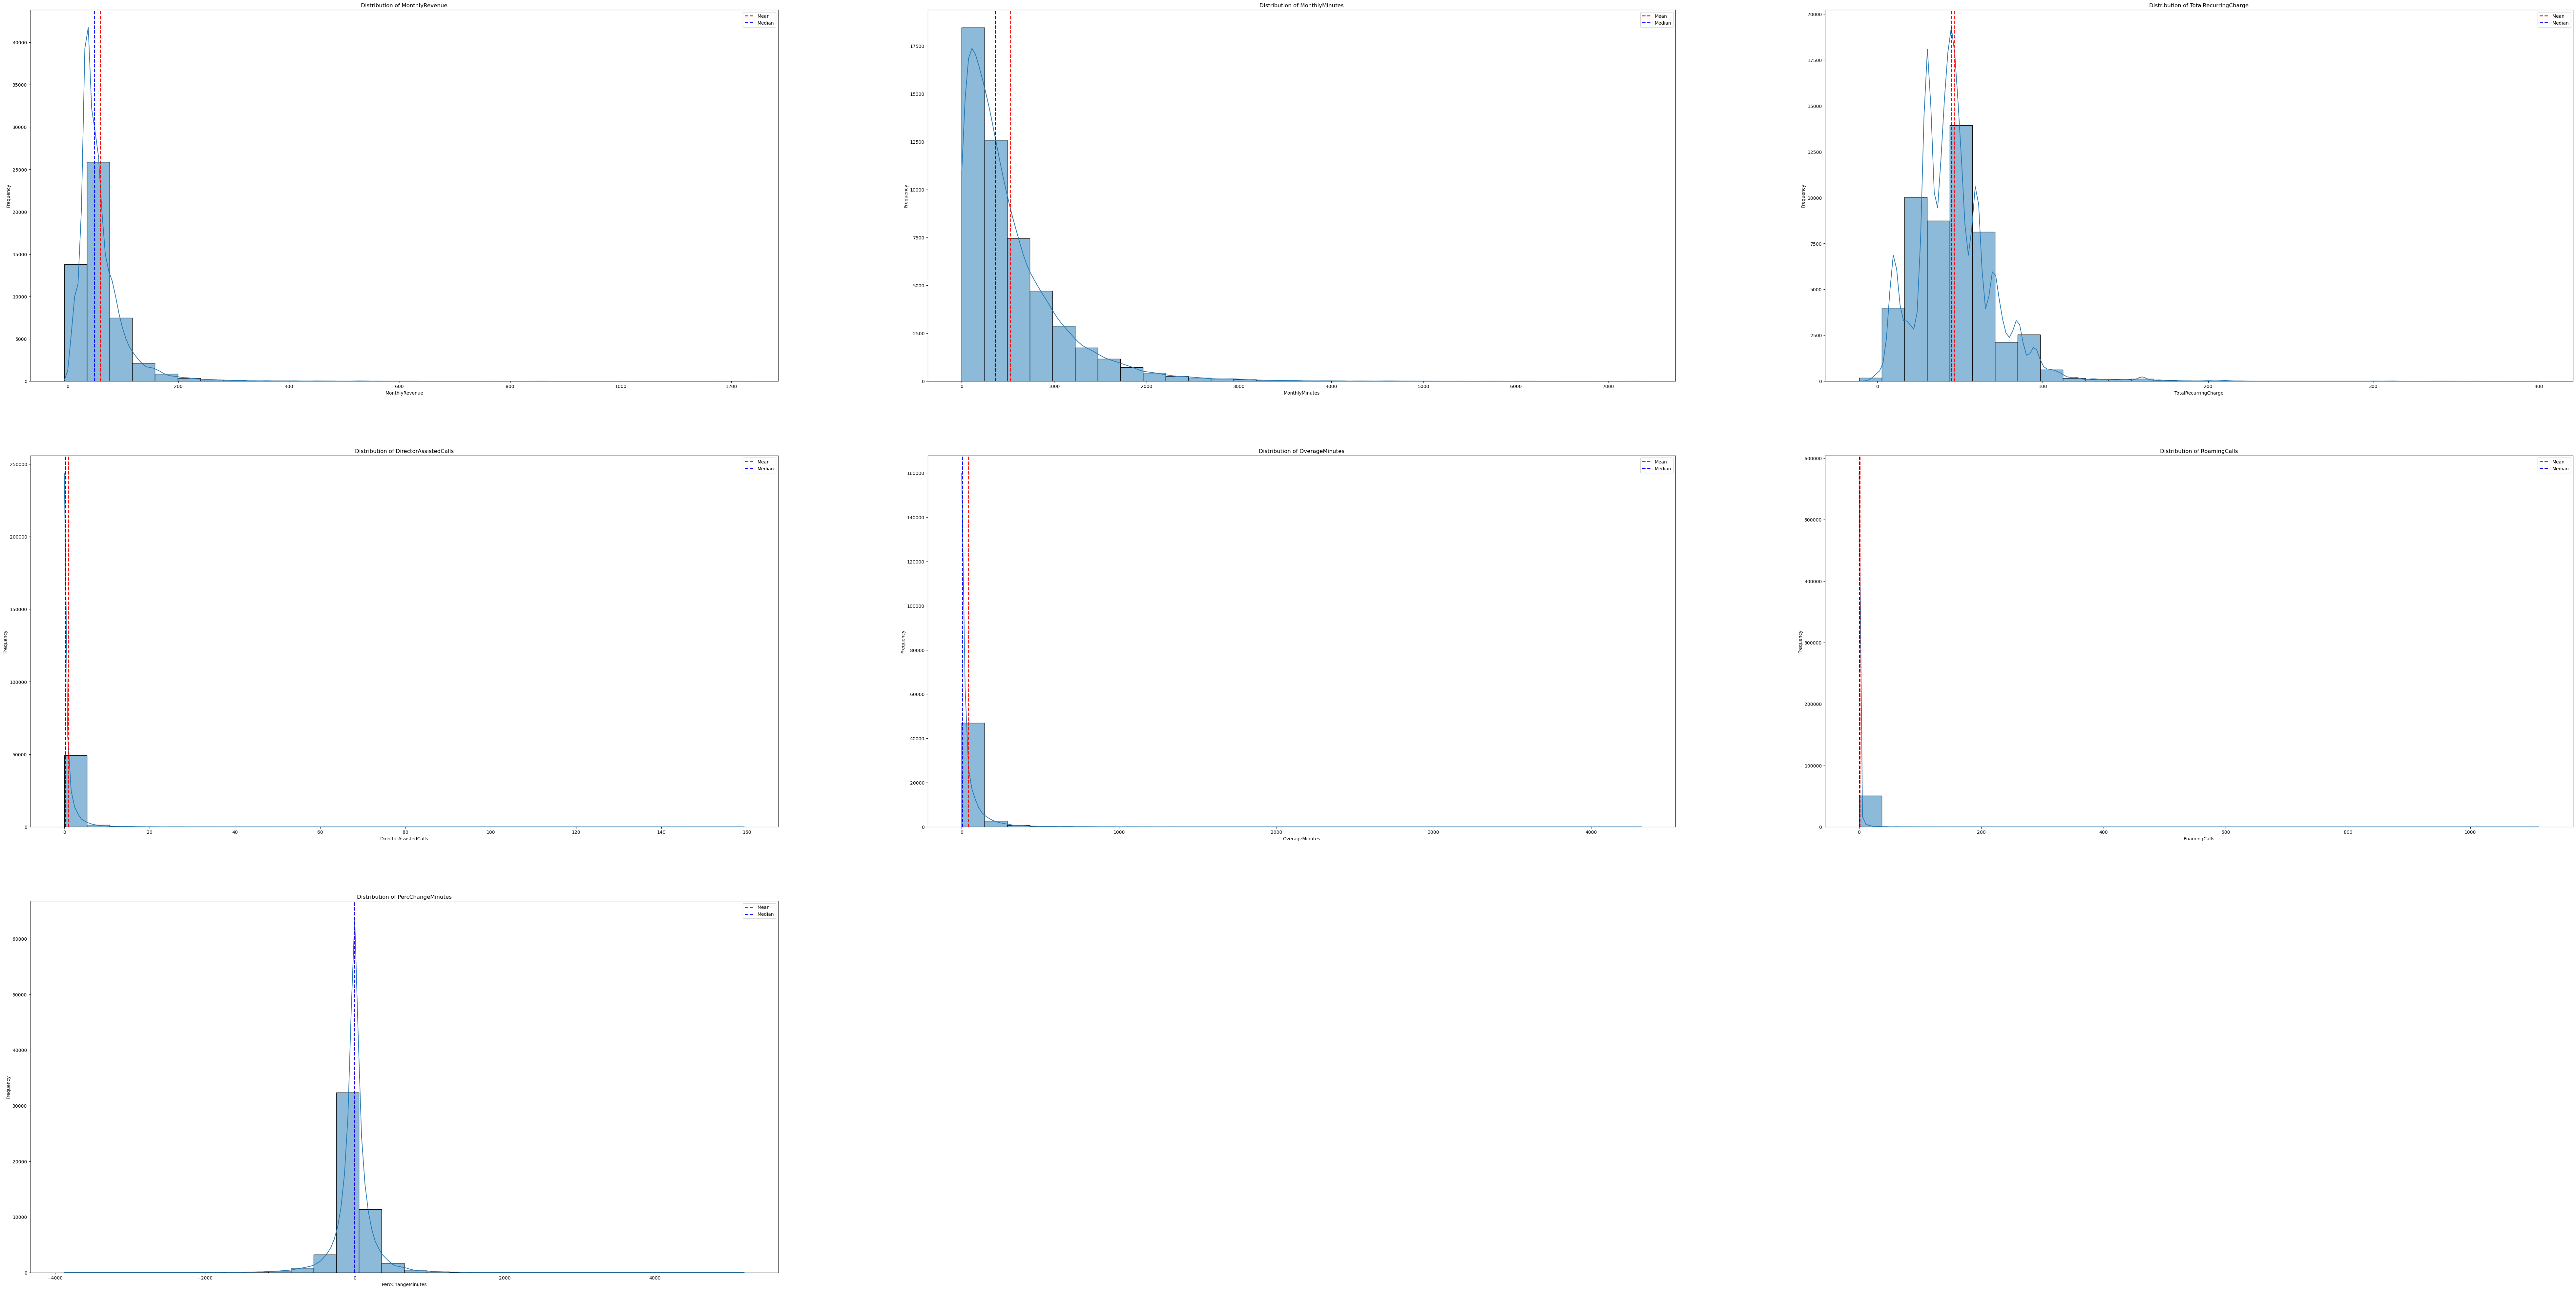

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# float 타입의 컬럼만 뽑기
float_columns = nam[:-2].index

# Figure 생성
plt.figure(figsize=(100, 50))

# 각 float 컬럼에 대해 히스토그램 그리기
for i, col in enumerate(float_columns, 1):
    plt.subplot(len(float_columns)//3 + 1, 3, i)  # 3열 서브플롯 설정
    mean_value = df[col].mean()
    median_value = df[col].median()
    
    sns.histplot(df[col], bins=30, kde=True)
    
    # 평균값과 중앙값 선 추가
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Median')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.legend()

# 전체 그래프 레이아웃 조정
# plt.tight_layout()
plt.show()


### Montly Minutes 최빈값으로 채우기

In [52]:
# MonthlyMinutes 컬럼의 최빈값 구하기
mode_monthly_minutes = df['MonthlyMinutes'].mode()[0]

# 결측치를 최빈값으로 채우기
df['MonthlyMinutes'].fillna(mode_monthly_minutes, inplace=True)

# 결측치 처리 후 결과 확인
print(df['MonthlyMinutes'].isnull().sum())


0


C:\Users\USER\AppData\Local\Temp\ipykernel_3864\2634206314.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyMinutes'].fillna(mode_monthly_minutes, inplace=True)


In [53]:
df.isna().sum()[df.isna().sum() >= 1]

MonthlyRevenue           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
dtype: int64

### float 데이터타입 컬럼, 중앙값으로 대체

In [54]:
nam2 = df.isna().sum()[df.isna().sum() > 0]
nam2.index

Index(['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls',
       'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues'],
      dtype='object')

In [55]:
for columns in nam2.index:
    df[columns] = df[columns].fillna(df[columns].median(axis=0)).astype(int)

In [56]:
df.isna().sum()[df.isna().sum() >= 1]

Series([], dtype: int64)

### Total call 전화량 컬럼 만들기 , 휴대폰 사용료 대비 사용량 컬럼 만들기

In [57]:
calls_columns = [col for col in df.columns if col.endswith('Calls')]


In [58]:
calls_columns

['DirectorAssistedCalls',
 'RoamingCalls',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'RetentionCalls']

In [59]:
df['total_call'] = df[calls_columns].sum(axis=1)

In [60]:
df.drop(columns=calls_columns,inplace=True)

In [61]:
df['TotalChargePerCall'] = df['TotalRecurringCharge'] / (df['total_call'] + 1)

### PercChangeMinutes, PercChangeRevenues > 컬럼 1,0 으로 변환하기
- 통화시간 변화율, 수익 변화율 양의증가율은 1로, 음의 증가율은 0으로

In [62]:
df[['PercChangeMinutes','PercChangeRevenues']]

,PercChangeMinutes,PercChangeRevenues
0,-157,-19
1,-4,0
2,-2,0
3,157,8
4,0,0
...,...,...
51042,-5,0
51043,122,15
51044,-5,0
51045,-5,0


In [63]:
df['PercChangeMinutes'] = df['PercChangeMinutes'].apply(lambda x: 1 if x > 0 else 0)
df['PercChangeRevenues'] = df['PercChangeRevenues'].apply(lambda x: 1 if x > 0 else 0)


### 이진형 데이터 0,1 encoding

In [64]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

In [65]:
binary_columns

['Churn',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [66]:
le = LabelEncoder()

for binary in binary_columns[1:]:
    df[binary] = le.fit_transform(df[binary])

### one-hot encoding (Service Area, PrizmCode, Occupation)

In [67]:
# One-Hot Encoding을 적용할 컬럼
one_hot_columns = ['ServiceArea', 'PrizmCode', 'Occupation']

# One-Hot Encoding 적용
df = pd.get_dummies(df, columns=one_hot_columns)


In [68]:
df.columns[df.isna().sum()>0]

Index([], dtype='object')

### DataFrame 저장

In [69]:
df.to_csv('preprocessing.csv', index=False)


# ML/DL 모델

### 머신러닝 모델

#### Min, Max scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 수치형 컬럼에 Min-Max Scaling 적용

for col in df.columns[1:]:
    df[col] = scaler.fit_transform(df[[col]])


#### 오버샘플링 방식 2가지 (SMOTE, RandomOverSampler 사용) -> 2가지 데이터셋 사용

In [87]:
X = df.drop(columns='Churn')
y = df['Churn']

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify= y)

In [89]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)
x_ros_resampled, y_ros_resampled = ros.fit_resample(x_train, y_train)

# (SMOTE) 클래스 분포 확인
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({0: 27252, 1: 11033})
Resampled class distribution: Counter({1: 27252, 0: 27252})


In [90]:
sm_metrics = {}
ros_metrics = {}
normal_metrics = {}

#### ExraTressClassifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
import numpy as np



# ExtraTreesClassifier 모델 생성
ext = ExtraTreesClassifier(random_state=42)
ext.fit(x_train,y_train)


y_pred_ext = ext.predict(x_test)
y_pred_proba_ext = ext.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_ext)
auc = roc_auc_score(y_test, y_pred_proba_ext)
precision = precision_score(y_test, y_pred_ext)
recall = recall_score(y_test,y_pred_ext)
f1 = f1_score(y_test, y_pred_ext)


print(f"ExtraTrees - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")


ExtraTrees - Accuracy: 0.7091, AUC: 0.6063,Precision: 0.4715, F1 Score: 0.1351


In [92]:
normal_metrics['ext'] = [accuracy,auc,precision,recall,f1]

In [93]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
import numpy as np



# ExtraTreesClassifier 모델 생성
ext = ExtraTreesClassifier(random_state=42)
ext.fit(x_resampled,y_resampled)


y_pred_ext = ext.predict(x_test)
y_pred_proba_ext = ext.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_ext)
auc = roc_auc_score(y_test, y_pred_proba_ext)
precision = precision_score(y_test, y_pred_ext)
recall = recall_score(y_test,y_pred_ext)
f1 = f1_score(y_test, y_pred_ext)


print(f"ExtraTrees - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")


ExtraTrees - Accuracy: 0.6944, AUC: 0.6121,Precision: 0.4168, F1 Score: 0.2219


In [94]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
import numpy as np



# ExtraTreesClassifier 모델 생성
ext = ExtraTreesClassifier(random_state=42)
ext.fit(x_resampled,y_resampled)


y_pred_ext = ext.predict(x_test)
y_pred_proba_ext = ext.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_ext)
auc = roc_auc_score(y_test, y_pred_proba_ext)
precision = precision_score(y_test, y_pred_ext)
recall = recall_score(y_test,y_pred_ext)
f1 = f1_score(y_test, y_pred_ext)


print(f"ExtraTrees - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")


ExtraTrees - Accuracy: 0.6944, AUC: 0.6121,Precision: 0.4168, F1 Score: 0.2219


In [95]:
sm_metrics['ext'] = [accuracy,auc,precision,recall,f1]

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
import numpy as np



# ExtraTreesClassifier 모델 생성
ext = ExtraTreesClassifier(random_state=42)
ext.fit(x_ros_resampled,y_ros_resampled)


y_pred_ext = ext.predict(x_test)
y_pred_proba_ext = ext.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_ext)
auc = roc_auc_score(y_test, y_pred_proba_ext)
precision = precision_score(y_test, y_pred_ext)
recall = recall_score(y_test,y_pred_ext)
f1 = f1_score(y_test, y_pred_ext)


print(f"ExtraTrees - Accuracy: {accuracy:.4f}, AUC: {auc:.4f},Precision: {precision:.4f}, F1 Score: {f1:.4f}")


ExtraTrees - Accuracy: 0.7093, AUC: 0.6017,Precision: 0.4684, F1 Score: 0.1133


In [97]:
ros_metrics['ext'] = [accuracy,auc,precision,recall,f1]

#### XGBClassifier

In [98]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np


# XGBoostClassifier 모델 생성
xgb = XGBClassifier()

xgb.fit(x_train, y_train)


y_pred_xgb = xgb.predict(x_test)
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_proba_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy:.4f}, recall: {recall:.4f} ,AUC: {auc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

XGBoost - Accuracy: 0.7058, recall: 0.1710 ,AUC: 0.6419, Precision: 0.4715, F1 Score: 0.2510


In [99]:
normal_metrics['xgb'] = [accuracy,auc,precision,recall,f1]

In [100]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np


# XGBoostClassifier 모델 생성
xgb = XGBClassifier()

xgb.fit(x_resampled, y_resampled)


y_pred_xgb = xgb.predict(x_test)
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_proba_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy:.4f}, recall: {recall:.4f} ,AUC: {auc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

XGBoost - Accuracy: 0.7102, recall: 0.1955 ,AUC: 0.6481, Precision: 0.4928, F1 Score: 0.2799


In [101]:
sm_metrics['xgb'] = [accuracy,auc,precision,recall,f1]

In [102]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np


# XGBoostClassifier 모델 생성
xgb = XGBClassifier()

xgb.fit(x_ros_resampled, y_ros_resampled)


y_pred_xgb = xgb.predict(x_test)
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_proba_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy:.4f}, recall: {recall:.4f} ,AUC: {auc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

XGBoost - Accuracy: 0.6348, recall: 0.5182 ,AUC: 0.6424, Precision: 0.3975, F1 Score: 0.4499


In [103]:
ros_metrics['xgb'] = [accuracy,auc,precision,recall,f1]

#### lightgbm

In [104]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

lgb.fit(x_train, y_train)


y_pred_lgb = lgb.predict(x_test)
y_pred_proba_lgb = lgb.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_lgb)
auc = roc_auc_score(y_test, y_pred_proba_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)

print(f"XGBoost - Accuracy: {accuracy:.4f}, recall: {recall:.4f} ,AUC: {auc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

[LightGBM] [Info] Number of positive: 11033, number of negative: 27252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 38285, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288181 -> initscore=-0.904236
[LightGBM] [Info] Start training from score -0.904236
XGBoost - Accuracy: 0.7172, recall: 0.1001 ,AUC: 0.6581, Precision: 0.5517, F1 Score: 0.1694


In [105]:
normal_metrics['lgb'] = [accuracy,auc,precision,recall,f1]

In [106]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

lgb.fit(x_resampled, y_resampled)


y_pred_lgb = lgb.predict(x_test)
y_pred_proba_lgb = lgb.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_lgb)
auc = roc_auc_score(y_test, y_pred_proba_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)

print(f"XGBoost - Accuracy: {accuracy:.4f}, recall: {recall:.4f} ,AUC: {auc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

[LightGBM] [Info] Number of positive: 27252, number of negative: 27252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10066
[LightGBM] [Info] Number of data points in the train set: 54504, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
XGBoost - Accuracy: 0.7155, recall: 0.1234 ,AUC: 0.6616, Precision: 0.5273, F1 Score: 0.2000


In [107]:
sm_metrics['lgb'] = [accuracy,auc,precision,recall,f1]

In [108]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

lgb.fit(x_ros_resampled, y_ros_resampled)


y_pred_lgb = lgb.predict(x_test)
y_pred_proba_lgb = lgb.predict_proba(x_test)[:, 1]

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred_lgb)
auc = roc_auc_score(y_test, y_pred_proba_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)

print(f"XGBoost - Accuracy: {accuracy:.4f}, recall: {recall:.4f} ,AUC: {auc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

[LightGBM] [Info] Number of positive: 27252, number of negative: 27252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 54504, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
XGBoost - Accuracy: 0.6181, recall: 0.6134 ,AUC: 0.6599, Precision: 0.3952, F1 Score: 0.4807


In [109]:
ros_metrics['lgb'] = [accuracy,auc,precision,recall,f1]

#### linear model

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# 순수한 선형 회귀 모델 생성
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(x_train, y_train)

# 예측 (확률값)
y_pred_prob = linear_model.predict(x_test)

# 예측값을 0.5 기준으로 이진화
y_pred = (y_pred_prob > 0.5).astype("int32")

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 성능 지표 출력 및 변수에 저장
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 71.18%
AUC: 0.61
Precision: 50.00%
Recall: 2.69%
F1-Score: 5.11%


In [111]:
normal_metrics['lr'] = [accuracy,auc,precision,recall,f1]

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# 순수한 선형 회귀 모델 생성
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(x_resampled, y_resampled)

# 예측 (확률값)
y_pred_prob = linear_model.predict(x_test)

# 예측값을 0.5 기준으로 이진화
y_pred = (y_pred_prob > 0.5).astype("int32")

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 성능 지표 출력 및 변수에 저장
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 57.73%
AUC: 0.61
Precision: 35.88%
Recall: 59.30%
F1-Score: 44.71%


In [113]:
sm_metrics['lr'] = [accuracy,auc,precision,recall,f1]

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# 순수한 선형 회귀 모델 생성
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(x_ros_resampled, y_ros_resampled)

# 예측 (확률값)
y_pred_prob = linear_model.predict(x_test)

# 예측값을 0.5 기준으로 이진화
y_pred = (y_pred_prob > 0.5).astype("int32")

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 성능 지표 출력 및 변수에 저장
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 59.03%
AUC: 0.61
Precision: 36.41%
Recall: 56.47%
F1-Score: 44.27%


In [115]:
ros_metrics['lr'] = [accuracy,auc,precision,recall,f1]

#### MLP

In [116]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split




model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수 사용, 규제 적용)
model.add(Dense(250, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수 사용, 규제 적용)
model.add(Dense(250, activation='relu', kernel_regularizer=l2(0.001)))

# 출력층 (이진 분류를 위해 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, binary_crossentropy 손실 함수)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 설정 (검증 손실이 20번 연속 개선되지 않으면 학습 종료)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습 (검증 데이터를 20%로 사용, 조기 종료 적용)
history = model.fit(x_train, y_train, epochs=214, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 모델 예측
y_pred_prob = model.predict(x_test)  # 예측 확률
y_pred = (y_pred_prob > 0.5).astype("int32")  # 0.5 이상의 확률을 1로 변환

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 성능 지표 출력 및 변수에 저장
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Epoch 1/214
958/958 [==============================] - 2s 2ms/step - loss: 0.6468 - accuracy: 0.7102 - val_loss: 0.5934 - val_accuracy: 0.7175
Epoch 2/214
958/958 [==============================] - 1s 1ms/step - loss: 0.5981 - accuracy: 0.7104 - val_loss: 0.5882 - val_accuracy: 0.7175
Epoch 3/214
958/958 [==============================] - 1s 1ms/step - loss: 0.5961 - accuracy: 0.7104 - val_loss: 0.5873 - val_accuracy: 0.7175
Epoch 4/214
958/958 [==============================] - 1s 1ms/step - loss: 0.5944 - accuracy: 0.7104 - val_loss: 0.5866 - val_accuracy: 0.7175
Epoch 5/214
958/958 [==============================] - 1s 1ms/step - loss: 0.5941 - accuracy: 0.7104 - val_loss: 0.5858 - val_accuracy: 0.7175
Epoch 6/214
958/958 [==============================] - 1s 1ms/step - loss: 0.5933 - accuracy: 0.7104 - val_loss: 0.5853 - val_accuracy: 0.7175
Epoch 7/214
958/958 [==============================] - 1s 1ms/step - loss: 0.5931 - accuracy: 0.7104 - val_loss: 0.5848 - val_accuracy: 0.7175

In [117]:
normal_metrics['mlp'] = [accuracy,auc,precision,recall,f1]

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split




model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수 사용, 규제 적용)
model.add(Dense(250, input_dim=x_resampled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수 사용, 규제 적용)
model.add(Dense(250, activation='relu', kernel_regularizer=l2(0.001)))

# 출력층 (이진 분류를 위해 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, binary_crossentropy 손실 함수)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 설정 (검증 손실이 20번 연속 개선되지 않으면 학습 종료)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습 (검증 데이터를 20%로 사용, 조기 종료 적용)
history = model.fit(x_resampled, y_resampled, epochs=214, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 모델 예측
y_pred_prob = model.predict(x_test)  # 예측 확률
y_pred = (y_pred_prob > 0.5).astype("int32")  # 0.5 이상의 확률을 1로 변환

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 성능 지표 출력 및 변수에 저장
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Epoch 1/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6937 - accuracy: 0.6256 - val_loss: 0.9166 - val_accuracy: 0.0573
Epoch 2/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6535 - accuracy: 0.6280 - val_loss: 0.9634 - val_accuracy: 0.0302
Epoch 3/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6509 - accuracy: 0.6286 - val_loss: 0.9968 - val_accuracy: 0.0423
Epoch 4/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6497 - accuracy: 0.6289 - val_loss: 0.9740 - val_accuracy: 0.0472
Epoch 5/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6480 - accuracy: 0.6309 - val_loss: 0.9525 - val_accuracy: 0.0838
Epoch 6/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6471 - accuracy: 0.6309 - val_loss: 1.1135 - val_accuracy: 0.0298
Epoch 7/214
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6475 - accuracy: 0.6302 - val_loss: 0.9420 - val_ac

In [119]:
sm_metrics['mlp'] = [accuracy,auc,precision,recall,f1]

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split




model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수 사용, 규제 적용)
model.add(Dense(250, input_dim=x_resampled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수 사용, 규제 적용)
model.add(Dense(250, activation='relu', kernel_regularizer=l2(0.001)))

# 출력층 (이진 분류를 위해 sigmoid 활성화 함수 사용)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, binary_crossentropy 손실 함수)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 설정 (검증 손실이 20번 연속 개선되지 않으면 학습 종료)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습 (검증 데이터를 20%로 사용, 조기 종료 적용)
history = model.fit(x_ros_resampled, y_ros_resampled, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 모델 예측
y_pred_prob = model.predict(x_test)  # 예측 확률
y_pred = (y_pred_prob > 0.5).astype("int32")  # 0.5 이상의 확률을 1로 변환

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 성능 지표 출력 및 변수에 저장
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Epoch 1/300
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6892 - accuracy: 0.6278 - val_loss: 0.9901 - val_accuracy: 0.0576
Epoch 2/300
1363/1363 [==============================] - 2s 2ms/step - loss: 0.6538 - accuracy: 0.6302 - val_loss: 0.9648 - val_accuracy: 0.0974
Epoch 3/300
1363/1363 [==============================] - 2s 2ms/step - loss: 0.6515 - accuracy: 0.6319 - val_loss: 1.0190 - val_accuracy: 0.1016
Epoch 4/300
1363/1363 [==============================] - 2s 2ms/step - loss: 0.6501 - accuracy: 0.6296 - val_loss: 0.9374 - val_accuracy: 0.0955
Epoch 5/300
1363/1363 [==============================] - 2s 2ms/step - loss: 0.6493 - accuracy: 0.6326 - val_loss: 1.0267 - val_accuracy: 0.0723
Epoch 6/300
1363/1363 [==============================] - 2s 2ms/step - loss: 0.6489 - accuracy: 0.6324 - val_loss: 1.0007 - val_accuracy: 0.0585
Epoch 7/300
1363/1363 [==============================] - 2s 2ms/step - loss: 0.6481 - accuracy: 0.6320 - val_loss: 1.1422 - val_ac

In [121]:
ros_metrics['mlp'] = [accuracy,auc,precision,recall,f1]

In [122]:
me1 = pd.DataFrame(sm_metrics,index=['accuracy','auc','precision','recall','f1'])
me2 = pd.DataFrame(ros_metrics,index=['accuracy','auc','precision','recall','f1'])
me3 = pd.DataFrame(normal_metrics,index=['accuracy','auc','precision','recall','f1'])



#### 종합 그래프

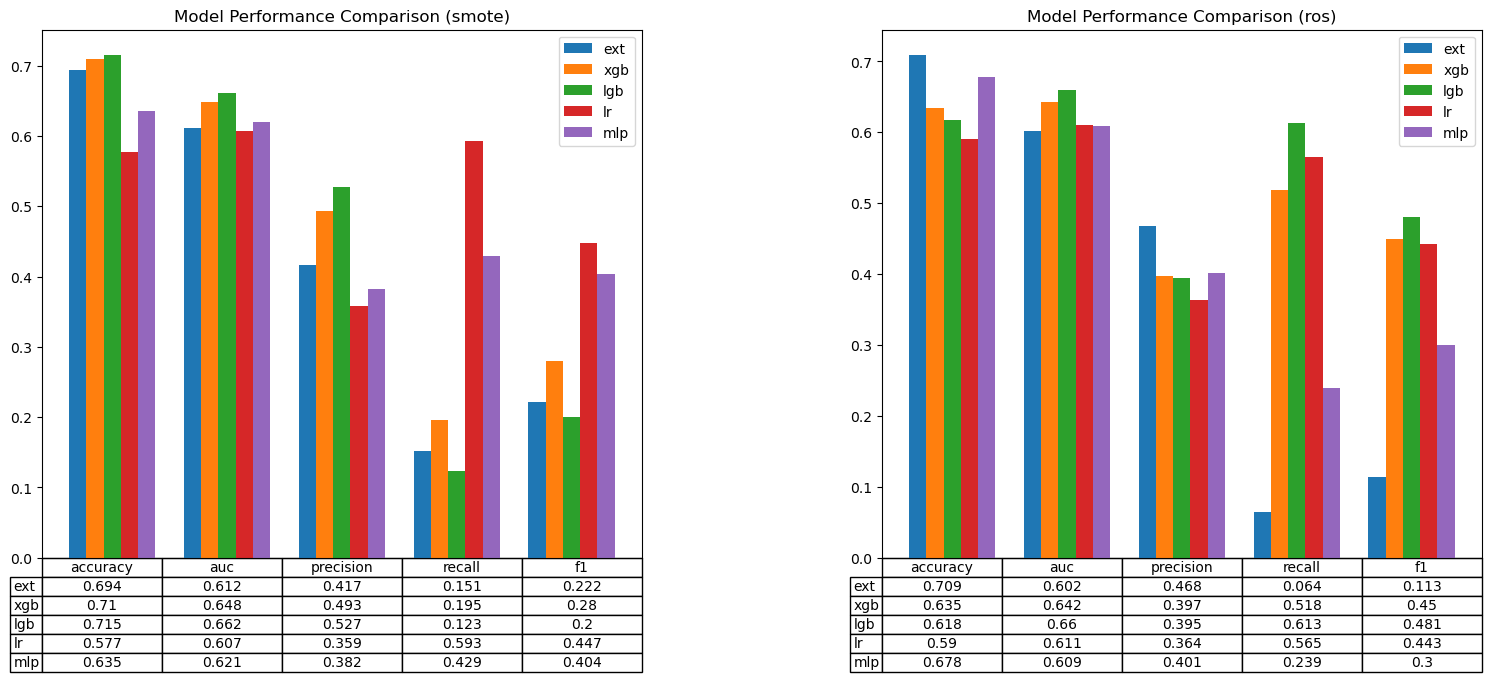

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 첫 번째 데이터프레임 me1을 기반으로 성능 지표와 모델별 성능 막대 그래프 그리기
ev1 = me1.index  # 성능 지표 (accuracy, auc, precision, recall, f1)
models1 = me1.columns  # 모델 (lightgbm, xgboost, lr, nb, mlp)

# 두 번째 데이터프레임 me2을 기반으로 성능 지표와 모델별 성능 막대 그래프 그리기
ev2 = me2.index  # 성능 지표 (accuracy, auc, precision, recall, f1)
models2 = me2.columns  # 모델 (lightgbm, xgboost, lr, nb, mlp)

# X축 좌표 설정
x1 = np.arange(len(ev1))  # 성능 지표 개수에 따른 X축 값 설정
x2 = np.arange(len(ev2))
width = 0.15  # 막대 너비 설정

# 그래프 설정 (두 개의 subplot을 가로로 배치)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # 1행 2열로 서브플롯 배치

# 첫 번째 그래프 (me1에 대한 막대 그래프 그리기)
for i, model in enumerate(models1):
    ax1.bar(x1 + i * width - 2*width, me1[model], width, label=model)

ax1.set_title('Model Performance Comparison (smote)')
ax1.set_xticks([])
# ax1.set_xticklabels(ev1)
ax1.legend()

# 그래프 하단에 표 추가
table_data1 = np.round(me1.values, 3).tolist()  # 소수점 3자리로 반올림
table_data1 = np.array(table_data1).T
table1 = ax1.table(cellText=table_data1, colLabels=ev1, rowLabels=models1, loc='bottom', cellLoc='center')

# 두 번째 그래프 (me2에 대한 막대 그래프 그리기)
for i, model in enumerate(models2):
    ax2.bar(x2 + i * width - 2*width, me2[model], width, label=model)

ax2.set_title('Model Performance Comparison (ros)')
ax2.set_xticks([])
# ax2.set_xticklabels(ev2)
ax2.legend()

# 그래프 하단에 표 추가
table_data2 = np.round(me2.values, 3).tolist()  # 소수점 3자리로 반올림
table_data2 = np.array(table_data2).T
table2 = ax2.table(cellText=table_data2, colLabels=ev2, rowLabels=models2, loc='bottom', cellLoc='center')

# 표와 그래프 사이 간격 조정
plt.subplots_adjust(left=0.1, bottom=0.0000001, wspace=0.4)  # wspace로 서브플롯 간 간격 조정
# 그래프 출력
plt.show()


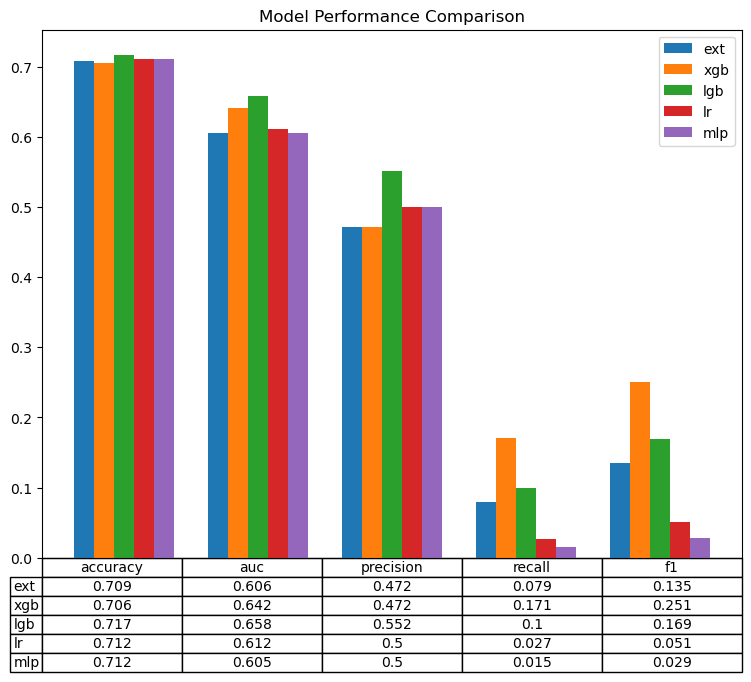

In [124]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터프레임 me를 기반으로 성능 지표와 모델별 성능을 나타내는 데이터로 막대 그래프 그리기
ev = me3.index  # 성능 지표 (accuracy, auc, precision, recall, f1)
models = me3.columns  # 모델 (lightgbm, xgboost, lr, nb, mlp)

# X축 좌표 설정
x = np.arange(len(ev))  # 성능 지표 개수에 따른 X축 값 설정
width = 0.15  # 막대 너비 설정

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 각 모델에 대한 막대 그래프 그리기 (모델별로 막대를 옆으로 나란히 배치)
for i, model in enumerate(models):
    _=ax.bar(x + i * width - 2*width, me3[model], width, label=model)

_=ax.set_title('Model Performance Comparison')
_=ax.set_xticks([])
_=ax.legend()

# 그래프 하단에 표 추가
# 데이터프레임을 2D 리스트로 변환하여 표로 추가
table_data = np.round(me3.values, 3).tolist()  # 소수점 2자리로 반올림
table_data = np.array(table_data).T
table = ax.table(cellText=table_data, colLabels=ev, rowLabels=models, loc='bottom', cellLoc='center')

# 표와 그래프 사이 간격 조정
plt.subplots_adjust(left=0.2, bottom=0.0000001)

# 그래프 출력
plt.show()



### 딥러닝 모델 (전처리1 + 라쏘 feature 선택)

- 동일한 데이터셋을 이용한 논문을 찾음.
- 전처리는 논문을 참고하였으나 코드가 공개되어 있지않아 구체적으로 알 수 없었음.
- 딥러닝 모델을 최대한 그대로 따라 구현하려고 노력함.

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('preprocessing.csv')

In [54]:
df.max()

Churn                             1
MonthlyRevenue                 1223
MonthlyMinutes               7359.0
TotalRecurringCharge            400
OverageMinutes                 4321
PercChangeMinutes                 1
PercChangeRevenues                1
PeakCallsInOut               2090.7
OffPeakCallsInOut            1474.7
MonthsInService                  61
UniqueSubs                      196
ActiveSubs                       53
Handsets                       24.0
HandsetModels                  15.0
CurrentEquipmentDays         1812.0
ChildrenInHH                      1
HandsetRefurbished                1
HandsetWebCapable                 1
TruckOwner                        1
RVOwner                           1
Homeownership                     1
BuysViaMailOrder                  1
RespondsToMailOffers              1
OptOutMailings                    1
NonUSTravel                       1
OwnsComputer                      1
HasCreditCard                     1
RetentionOffersAccepted     

In [13]:
import pandas as pd

# 데이터프레임에서 컬럼별 최대값 확인
minmaxcol = df.columns[df.max() > 100]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 최대값이 100 이상인 컬럼 선택
minmaxcol = df.columns[df.max() > 100]

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택된 컬럼에만 스케일 적용
df[minmaxcol] = scaler.fit_transform(df[minmaxcol])


In [17]:
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,PercChangeMinutes,PercChangeRevenues,PeakCallsInOut,OffPeakCallsInOut,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,total_call,TotalChargePerCall,ServiceArea_Central,ServiceArea_East,ServiceArea_Q,ServiceArea_West,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,1,0.024410,0.029759,0.080292,0.000000,0,0,0.027742,0.016274,61,0.005128,1,2.0,2.0,0.201431,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,4,0,0,1,1,0.028560,0.064756,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
1,1,0.017901,0.001359,0.068127,0.000000,0,0,0.002392,0.000678,58,0.000000,1,2.0,1.0,0.830490,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,0,0,0,4,0.000877,0.086436,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,0,0.035801,0.001087,0.119221,0.000000,0,0,0.000622,0.002509,60,0.000000,1,1.0,1.0,1.000000,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,6,0,0,0,3,0.000186,0.192792,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
3,0,0.071603,0.178285,0.209246,0.000000,1,1,0.265796,0.205940,59,0.005128,2,9.0,4.0,0.254816,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,6,0,0,0,4,0.250345,0.064043,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,1,0.018714,0.000000,0.068127,0.000000,0,0,0.000000,0.000000,53,0.005128,2,4.0,3.0,0.471657,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,9,0,1,0,1,0.000000,0.161850,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,0.043938,0.000000,0.136253,0.000694,0,0,0.076673,0.022581,29,0.000000,1,2.0,2.0,0.292240,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,6,0,0,0,1,0.039798,0.065309,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
51043,0,0.082181,0.237125,0.233577,0.010414,1,1,0.152437,0.168373,29,0.000000,1,2.0,2.0,0.258118,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,9,0,1,0,3,0.238789,0.064130,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False
51044,1,0.043938,0.000000,0.136253,0.000694,0,0,0.650022,0.617278,25,0.000000,1,3.0,2.0,0.210787,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,1,0,5,0.585547,0.063702,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
51045,0,0.043938,0.000000,0.136253,0.000694,0,0,0.000000,0.000000,31,0.000000,1,2.0,2.0,0.241057,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,5,0.000000,0.323699,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# bool 타입 컬럼만 선택해서 변환
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,PercChangeMinutes,PercChangeRevenues,PeakCallsInOut,OffPeakCallsInOut,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,total_call,TotalChargePerCall,ServiceArea_Central,ServiceArea_East,ServiceArea_Q,ServiceArea_West,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,1,0.024410,0.029759,0.080292,0.000000,0,0,0.027742,0.016274,61,0.005128,1,2.0,2.0,0.201431,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,4,0,0,1,1,0.028560,0.064756,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0.017901,0.001359,0.068127,0.000000,0,0,0.002392,0.000678,58,0.000000,1,2.0,1.0,0.830490,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,5,0,0,0,4,0.000877,0.086436,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0.035801,0.001087,0.119221,0.000000,0,0,0.000622,0.002509,60,0.000000,1,1.0,1.0,1.000000,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,6,0,0,0,3,0.000186,0.192792,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
3,0,0.071603,0.178285,0.209246,0.000000,1,1,0.265796,0.205940,59,0.005128,2,9.0,4.0,0.254816,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,6,0,0,0,4,0.250345,0.064043,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0.018714,0.000000,0.068127,0.000000,0,0,0.000000,0.000000,53,0.005128,2,4.0,3.0,0.471657,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,9,0,1,0,1,0.000000,0.161850,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,1,0.043938,0.000000,0.136253,0.000694,0,0,0.076673,0.022581,29,0.000000,1,2.0,2.0,0.292240,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,6,0,0,0,1,0.039798,0.065309,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
51043,0,0.082181,0.237125,0.233577,0.010414,1,1,0.152437,0.168373,29,0.000000,1,2.0,2.0,0.258118,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,9,0,1,0,3,0.238789,0.064130,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
51044,1,0.043938,0.000000,0.136253,0.000694,0,0,0.650022,0.617278,25,0.000000,1,3.0,2.0,0.210787,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,1,0,5,0.585547,0.063702,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
51045,0,0.043938,0.000000,0.136253,0.000694,0,0,0.000000,0.000000,31,0.000000,1,2.0,2.0,0.241057,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,5,0.000000,0.323699,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 데이터 스케일링 (선택 사항: Lasso는 스케일에 민감하기 때문에 일반적으로 스케일링을 수행함)
scaler = StandardScaler()
X = df.drop(columns=['Churn'])
y = df['Churn']  # y는 타겟 변수

scaler = StandardScaler()

# 각 컬럼에 대해 스케일링 적용
for col in df.columns[1:]:
    df[col] = scaler.fit_transform(df[[col]])  # 2D 형식으로 전달하기 위해 이중 대괄호 사용

# 결과 확인
print(df.head())


# Lasso 모델 생성 및 학습
lasso = Lasso(alpha=0.01)  # alpha 값은 규제 강도를 결정. 0.1은 예시값, 필요에 따라 조정 가능
lasso.fit(X, y)

# 피처 중요도 출력 (Lasso는 특성의 계수를 통해 중요도를 확인)
feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)

# 중요도가 큰 순서대로 정렬하여 출력
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature importance using Lasso Regression:\n", feature_importance)


In [34]:
# 중요도가 0이 아닌 피처만 선택
non_zero_feature_importance = feature_importance[feature_importance > 0]

# 중요도가 큰 순서대로 정렬하여 출력
non_zero_feature_importance = non_zero_feature_importance.sort_values(ascending=False)

# 중요도가 0이 아닌 피처만 출력
print("Feature importance using Lasso Regression (excluding 0 importance):\n", non_zero_feature_importance)


Feature importance using Lasso Regression (excluding 0 importance):
 CurrentEquipmentDays       0.035584
MadeCallToRetentionTeam    0.020283
PercChangeMinutes          0.014066
TotalRecurringCharge       0.008744
HandsetRefurbished         0.007805
UniqueSubs                 0.005810
RespondsToMailOffers       0.004812
TotalChargePerCall         0.004617
OverageMinutes             0.003568
HandsetWebCapable          0.002397
CreditRating               0.001450
MonthsInService            0.000527
dtype: float64


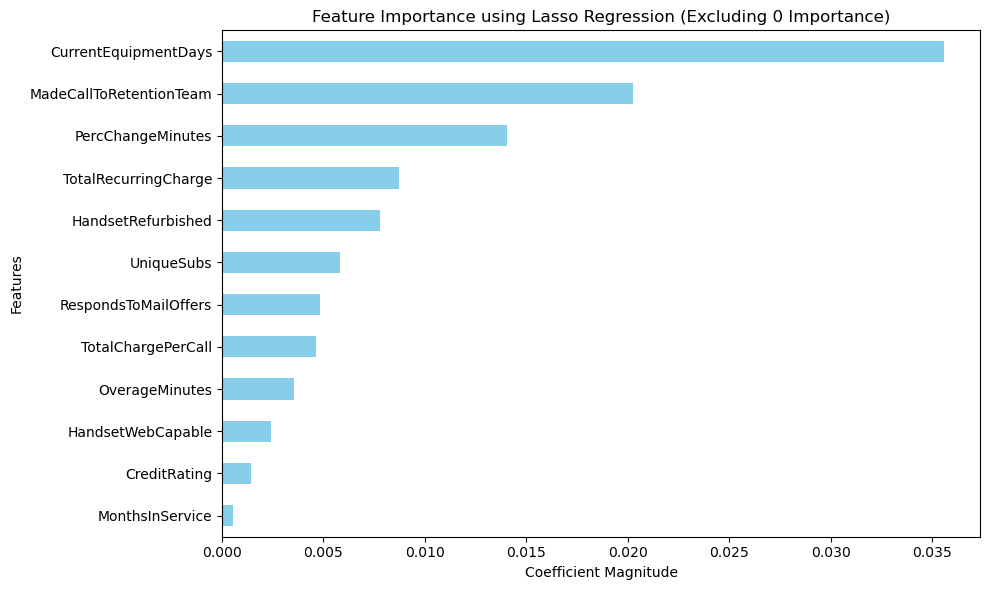

In [35]:
plt.figure(figsize=(10, 6))
non_zero_feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance using Lasso Regression (Excluding 0 Importance)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # 피처 중요도가 큰 순서대로 상단에 오도록 설정
plt.tight_layout()

In [36]:
non_zero_feature_importance = feature_importance[feature_importance > 0]
df_lasso_selected = df[non_zero_feature_importance.index]


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X = df_lasso_selected  # df_lasso_selected는 Lasso로 선택된 피처들로 구성된 데이터프레임
y = df['Churn']  # 목표 변수 (정답 레이블)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분리 (90% 학습, 10% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# 모델 구성
model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수)
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수)
model.add(Dense(250, activation='relu'))

# 출력층 (1개의 뉴런, Sigmoid 활성화 함수 - 이진 분류이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, Binary Cross-Entropy 손실 함수)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백 설정 (성능이 향상되지 않으면 학습 중단)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100,  # 초기 설정으로 100 epochs
                    callbacks=[early_stopping],
                    batch_size=32)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 예측 결과 확인 (AUC, Precision, Recall, F1-Score 등 추가 평가를 위해 sklearn 사용)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # 0.5 이상이면 1, 아니면 0으로 이진 분류

precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred_class)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Epoch 1/100
1436/1436 [==============================] - 8s 5ms/step - loss: 0.5868 - accuracy: 0.7095 - val_loss: 0.5752 - val_accuracy: 0.7240
Epoch 2/100
1436/1436 [==============================] - 6s 4ms/step - loss: 0.5810 - accuracy: 0.7117 - val_loss: 0.5680 - val_accuracy: 0.7234
Epoch 3/100
1436/1436 [==============================] - 5s 3ms/step - loss: 0.5777 - accuracy: 0.7121 - val_loss: 0.5694 - val_accuracy: 0.7222
Epoch 4/100
1436/1436 [==============================] - 5s 3ms/step - loss: 0.5763 - accuracy: 0.7128 - val_loss: 0.5673 - val_accuracy: 0.7222
Epoch 5/100
1436/1436 [==============================] - 5s 4ms/step - loss: 0.5750 - accuracy: 0.7130 - val_loss: 0.5685 - val_accuracy: 0.7205
Epoch 6/100
1436/1436 [==============================] - 6s 4ms/step - loss: 0.5737 - accuracy: 0.7134 - val_loss: 0.5683 - val_accuracy: 0.7207
Epoch 7/100
1436/1436 [==============================] - 7s 5ms/step - loss: 0.5727 - accuracy: 0.7135 - val_loss: 0.5671 - val_ac

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.regularizers import l2

# 데이터 준비
X = df_lasso_selected  # df_lasso_selected는 Lasso로 선택된 피처들로 구성된 데이터프레임
y = df['Churn']  # 목표 변수 (정답 레이블)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분리 (90% 학습, 10% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# 오버샘플링 적용 (훈련 데이터에 대해서만)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# 모델 구성
model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수
model.add(Dense(250, input_dim=X_train_resampled.shape[1], activation='relu'),activity_regularizer=l2(0.01))  # L2 정규화 적용

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수, Activity Regularization 적용)
model.add(Dense(250, activation='relu'),activity_regularizer=l2(0.01))

# 출력층 (1개의 뉴런, Sigmoid 활성화 함수 - 이진 분류이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, Binary Cross-Entropy 손실 함수)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백 설정 (성능이 향상되지 않으면 학습 중단)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train_resampled, y_train_resampled, 
                    validation_data=(X_test, y_test),
                    epochs=100,  # 초기 설정으로 100 epochs
                    callbacks=[early_stopping],
                    batch_size=32)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 예측 결과 확인 (AUC, Precision, Recall, F1-Score 등 추가 평가를 위해 sklearn 사용)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # 0.5 이상이면 1, 아니면 0으로 이진 분류

# 추가적인 지표 계산
precision_os = precision_score(y_test, y_pred_class)
recall_os = recall_score(y_test, y_pred_class)
f1_os = f1_score(y_test, y_pred_class)
auc_os = roc_auc_score(y_test, y_pred)
acc_os = accuracy_score(y_test, y_pred_class)

# 성능 지표 출력
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Epoch 1/100
2041/2041 [==============================] - 5s 2ms/step - loss: 0.6704 - accuracy: 0.5846 - val_loss: 0.6903 - val_accuracy: 0.5320
Epoch 2/100
2041/2041 [==============================] - 7s 3ms/step - loss: 0.6621 - accuracy: 0.5997 - val_loss: 0.6607 - val_accuracy: 0.5685
Epoch 3/100
2041/2041 [==============================] - 9s 4ms/step - loss: 0.6585 - accuracy: 0.6060 - val_loss: 0.6444 - val_accuracy: 0.5920
Epoch 4/100
2041/2041 [==============================] - 7s 3ms/step - loss: 0.6552 - accuracy: 0.6107 - val_loss: 0.6560 - val_accuracy: 0.5967
Epoch 5/100
2041/2041 [==============================] - 6s 3ms/step - loss: 0.6525 - accuracy: 0.6141 - val_loss: 0.6551 - val_accuracy: 0.5665
Epoch 6/100
2041/2041 [==============================] - 6s 3ms/step - loss: 0.6491 - accuracy: 0.6196 - val_loss: 0.6496 - val_accuracy: 0.5902
Epoch 7/100
2041/2041 [==============================] - 6s 3ms/step - loss: 0.6464 - accuracy: 0.6220 - val_loss: 0.6535 - val_ac

### 그래프 비교

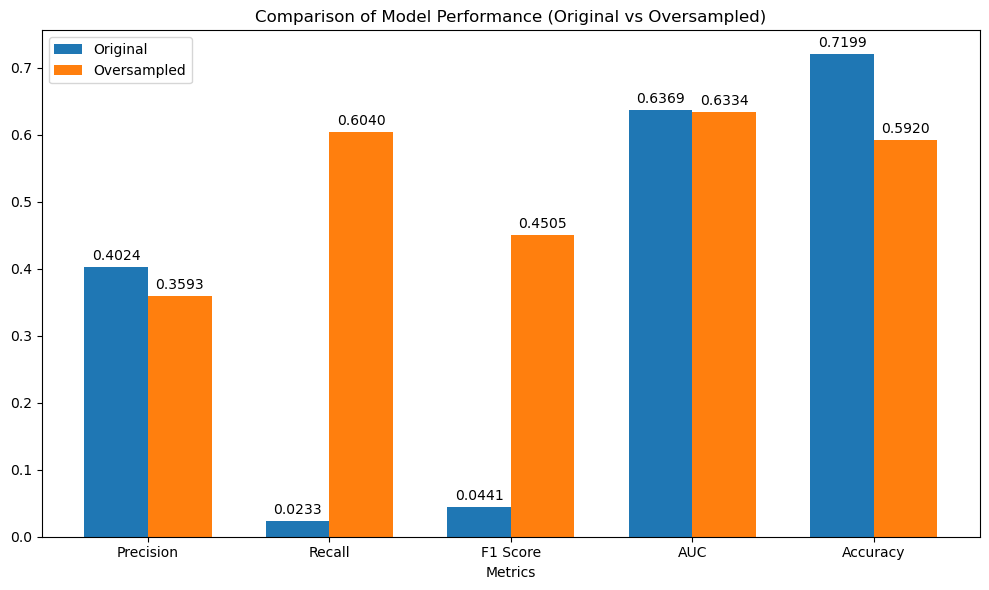

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# 두 개의 모델(오버샘플링 전후)의 성능 지표
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']
original_scores = [precision, recall, f1, auc, acc]  # 오버샘플링 전 성능 지표
oversampled_scores = [precision_os, recall_os, f1_os, auc_os, acc_os]  # 오버샘플링 후 성능 지표

# 막대 그래프 그리기
x = np.arange(len(metrics))  # 지표 개수만큼 x 축 좌표
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_scores, width, label='Original')
rects2 = ax.bar(x + width/2, oversampled_scores, width, label='Oversampled')

# 그래프 레이블 설정
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Model Performance (Original vs Oversampled)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# 막대 위에 값 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


### 딥러닝 모델 (논문전처리 + Xgboost feature 선택)

- 논문제목 : Customer Churn Prediction in Telecommunication Industry Using 
Customer Churn Prediction in Telecommunication Industry Using 
Deep Learning
- 2022
- Bahrain

In [320]:
df = pd.read_csv('cell2celltrain.csv')

In [321]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [322]:
df.isna().sum()[df.isna().sum() > 0]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

In [323]:
import pandas as pd
from sklearn.impute import SimpleImputer

# cell2cell 데이터셋 불러오기
# df = pd.read_csv('cell2cell.csv')  # 예시로 데이터셋을 불러옴

# 연속형 데이터에 대해 평균(mean)으로 결측값 처리
numeric_imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # 수치형 데이터만 선택
df_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# 범주형 데이터에 대해 최빈값(most frequent)으로 결측값 처리
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_categorical = df.select_dtypes(include=['object'])  # 범주형 데이터만 선택
df_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(df_categorical), columns=df_categorical.columns)

# 결측값이 처리된 데이터 합치기
df_imputed = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)


In [324]:
df_imputed.isna().sum()[df_imputed.isna().sum() > 0]

Series([], dtype: int64)

In [325]:
yes_no_columns = [col for col in df_imputed.columns if set(df_imputed[col].dropna().unique()) == {'Yes', 'No'}]


In [326]:
len(yes_no_columns)

16

In [327]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# cell2cell 데이터셋을 불러오는 부분 (df가 이미 정의되어 있다고 가정)
# df = pd.read_csv('cell2cell.csv')

# LabelEncoder 생성
le = LabelEncoder()

# 'yes/no' 형식의 컬럼 찾기
yes_no_columns = [col for col in df_imputed.columns if set(df_imputed[col].dropna().unique()) == {'Yes', 'No'}]
# 'yes/no' 형식의 컬럼들을 LabelEncoder로 변환
for col in yes_no_columns:
    df_imputed[col] = le.fit_transform(df_imputed[col])

# 변환된 결과 확인
print("Transformed 'yes/no' columns num: ", len(yes_no_columns))


Transformed 'yes/no' columns num:  16


In [328]:
df_imputed

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002.0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61.0,2.0,1.0,2.0,2.0,361.0,62.0,0.0,1.0,0.0,0.0,4.0,0.0,1,SEAPOR503,0,0,1,0,0,Known,1,1,0,0,1,1,0,0,0,30,1,1-Highest,Suburban,Professional,No
1,3000010.0,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58.0,1.0,1.0,2.0,1.0,1504.0,40.0,42.0,0.0,0.0,0.0,5.0,0.0,1,PITHOM412,1,0,0,0,0,Known,1,1,0,0,1,1,1,0,0,30,0,4-Medium,Suburban,Professional,Yes
2,3000014.0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,0.0,6.0,0.0,0,MILMIL414,1,0,0,0,0,Unknown,0,0,0,0,0,1,1,0,0,Unknown,0,3-Good,Town,Crafts,Yes
3,3000022.0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59.0,2.0,2.0,9.0,4.0,458.0,30.0,0.0,0.0,0.0,0.0,6.0,0.0,0,PITHOM412,0,0,1,0,0,Known,1,1,0,0,0,1,1,0,0,10,0,4-Medium,Other,Other,No
4,3000026.0,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,2.0,4.0,3.0,852.0,46.0,54.0,0.0,0.0,0.0,9.0,1.0,1,OKCTUL918,0,0,0,0,0,Known,1,1,0,0,1,1,0,1,0,10,0,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958.0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29.0,1.0,1.0,2.0,2.0,526.0,68.0,64.0,0.0,0.0,0.0,6.0,0.0,1,LAXSFN818,0,1,1,0,0,Known,1,1,0,0,0,1,0,0,0,60,0,1-Highest,Suburban,Other,Yes
51043,3399974.0,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29.0,1.0,1.0,2.0,2.0,464.0,48.0,48.0,0.0,0.0,0.0,9.0,1.0,0,LAXCDG310,1,0,1,0,0,Known,1,1,0,0,1,1,0,0,0,60,0,3-Good,Other,Other,No
51044,3399978.0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25.0,1.0,1.0,3.0,2.0,378.0,36.0,0.0,0.0,0.0,0.0,7.0,1.0,1,LAXCDG310,0,0,1,0,0,Known,0,0,0,0,0,1,0,0,0,80,0,5-Low,Other,Clerical,No
51045,3399990.0,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0,1.0,2.0,2.0,433.0,32.0,0.0,0.0,0.0,0.0,9.0,0.0,0,NEVPOW619,1,0,1,0,0,Unknown,0,0,0,0,0,0,0,0,0,30,0,5-Low,Other,Other,No


In [329]:
len(df['CustomerID'].unique())

51047

In [330]:
len(df['ServiceArea'].unique())

748

In [331]:
df_imputed.drop(columns=['CustomerID','ServiceArea'], inplace=True)

In [332]:
df_imputed

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61.0,2.0,1.0,2.0,2.0,361.0,62.0,0.0,1.0,0.0,0.0,4.0,0.0,1,0,0,1,0,0,Known,1,1,0,0,1,1,0,0,0,30,1,1-Highest,Suburban,Professional,No
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58.0,1.0,1.0,2.0,1.0,1504.0,40.0,42.0,0.0,0.0,0.0,5.0,0.0,1,1,0,0,0,0,Known,1,1,0,0,1,1,1,0,0,30,0,4-Medium,Suburban,Professional,Yes
2,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,0.0,6.0,0.0,0,1,0,0,0,0,Unknown,0,0,0,0,0,1,1,0,0,Unknown,0,3-Good,Town,Crafts,Yes
3,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59.0,2.0,2.0,9.0,4.0,458.0,30.0,0.0,0.0,0.0,0.0,6.0,0.0,0,0,0,1,0,0,Known,1,1,0,0,0,1,1,0,0,10,0,4-Medium,Other,Other,No
4,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,2.0,4.0,3.0,852.0,46.0,54.0,0.0,0.0,0.0,9.0,1.0,1,0,0,0,0,0,Known,1,1,0,0,1,1,0,1,0,10,0,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29.0,1.0,1.0,2.0,2.0,526.0,68.0,64.0,0.0,0.0,0.0,6.0,0.0,1,0,1,1,0,0,Known,1,1,0,0,0,1,0,0,0,60,0,1-Highest,Suburban,Other,Yes
51043,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29.0,1.0,1.0,2.0,2.0,464.0,48.0,48.0,0.0,0.0,0.0,9.0,1.0,0,1,0,1,0,0,Known,1,1,0,0,1,1,0,0,0,60,0,3-Good,Other,Other,No
51044,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25.0,1.0,1.0,3.0,2.0,378.0,36.0,0.0,0.0,0.0,0.0,7.0,1.0,1,0,0,1,0,0,Known,0,0,0,0,0,1,0,0,0,80,0,5-Low,Other,Clerical,No
51045,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0,1.0,2.0,2.0,433.0,32.0,0.0,0.0,0.0,0.0,9.0,0.0,0,1,0,1,0,0,Unknown,0,0,0,0,0,0,0,0,0,30,0,5-Low,Other,Other,No


In [333]:
df_imputed.isna().sum().sum()

0

In [334]:
import pandas as pd
df_one_hot_encoded = pd.get_dummies(df_imputed, drop_first=True)

In [335]:
df_one_hot_encoded

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,Homeownership_Unknown,HandsetPrice_100,HandsetPrice_130,HandsetPrice_150,HandsetPrice_180,HandsetPrice_200,HandsetPrice_240,HandsetPrice_250,HandsetPrice_30,HandsetPrice_300,HandsetPrice_40,HandsetPrice_400,HandsetPrice_500,HandsetPrice_60,HandsetPrice_80,HandsetPrice_Unknown,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61.0,2.0,1.0,2.0,2.0,361.0,62.0,0.0,1.0,0.0,0.0,4.0,0.0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58.0,1.0,1.0,2.0,1.0,1504.0,40.0,42.0,0.0,0.0,0.0,5.0,0.0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
2,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,0.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True
3,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59.0,2.0,2.0,9.0,4.0,458.0,30.0,0.0,0.0,0.0,0.0,6.0,0.0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,2.0,4.0,3.0,852.0,46.0,54.0,0.0,0.0,0.0,9.0,1.0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,

In [303]:
# df_one_hot_encoded 데이터프레임의 각 컬럼의 분산 계산
variances = df_one_hot_encoded.var()

# 결과 출력
print(variances)


MonthlyRevenue             1974.849155
MonthlyMinutes           279905.311620
TotalRecurringCharge        567.030439
DirectorAssistedCalls         4.951240
OverageMinutes             9300.745577
                             ...      
Occupation_Retired            0.014153
Occupation_Self               0.016923
Occupation_Student            0.007408
MaritalStatus_Unknown         0.236990
MaritalStatus_Yes             0.231879
Length: 84, dtype: float64


In [304]:
mean_variance = variances.mean()
mean_variance

5662.8398840113005

In [336]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. 수치형 피처만 선택
numeric_cols = df_one_hot_encoded.drop(columns=['Churn']).select_dtypes(include=['float64', 'int64'])

# 2. 분산 계산
variance = numeric_cols.var()

# 3. 고분산 피처 선택 (예: 분산이 1보다 큰 피처만 선택)
high_variance_cols = variance[variance > 1].index  # 분산 기준을 필요에 따라 조정 가능

# 4. MinMaxScaler를 고분산 피처에만 적용
scaler = MinMaxScaler()
df_one_hot_encoded[high_variance_cols] = scaler.fit_transform(df_one_hot_encoded[high_variance_cols])



In [337]:
df_one_hot_encoded['Churn']

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int32

In [338]:
X = df_one_hot_encoded.drop(columns=['Churn'])
y = df_one_hot_encoded['Churn']

In [339]:
    import xgboost as xgb
    from sklearn.model_selection import train_test_split

    # 데이터 스플릿 (훈련 세트와 테스트 세트로 분리)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # XGBoost 모델 생성 및 학습
    xgb_model = xgb.XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)

    # 피처 중요도 추출
    xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

    # 중요도가 큰 상위 10개 피처 추출 및 정렬
    top_10_features = xgb_importance.sort_values(ascending=False).head(10)

    # 결과 출력
    print("Top 10 important features using XGBoost:\n", top_10_features)

Top 10 important features using XGBoost:
 RetentionCalls          0.045573
CurrentEquipmentDays    0.027712
HandsetRefurbished      0.025796
CreditRating_5-Low      0.025111
MonthsInService         0.023928
HandsetWebCapable       0.023894
MonthlyMinutes          0.017410
PercChangeMinutes       0.016295
UniqueSubs              0.016206
HandsetPrice_Unknown    0.016171
dtype: float32


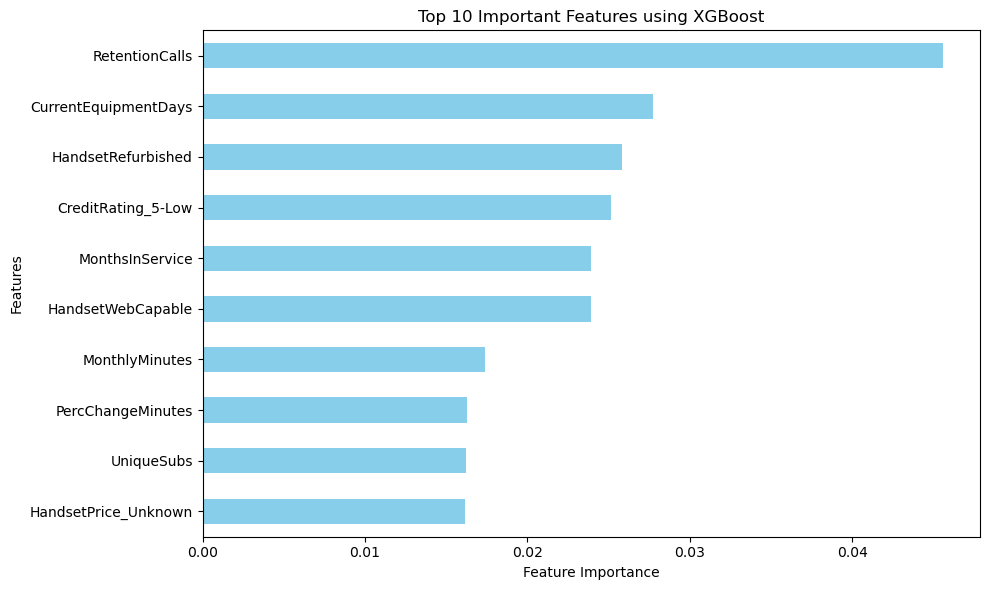

In [340]:
import matplotlib.pyplot as plt

# 중요도가 큰 상위 10개 피처를 가로 막대 그래프로 그리기
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features using XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # 중요도가 큰 순서대로 상단에 위치하게 설정
plt.tight_layout()

# 그래프 출력
plt.show()


In [341]:
# 중요도가 큰 상위 10개 피처의 이름을 추출
top_10_feature_names = top_10_features.index

# 선택된 중요도의 피처들만으로 새로운 데이터프레임 생성
X = X[top_10_feature_names]

In [342]:
X

,RetentionCalls,CurrentEquipmentDays,HandsetRefurbished,CreditRating_5-Low,MonthsInService,HandsetWebCapable,MonthlyMinutes,PercChangeMinutes,UniqueSubs,HandsetPrice_Unknown
0,1.0,0.201431,0,False,1.000000,1,0.029759,0.410058,0.005128,False
1,0.0,0.830490,0,False,0.945455,0,0.001359,0.426933,0.000000,False
2,0.0,1.000000,0,False,0.981818,0,0.001087,0.427153,0.000000,True
3,0.0,0.254816,0,False,0.963636,1,0.178285,0.444690,0.005128,False
4,0.0,0.471657,0,False,0.854545,0,0.000000,0.427374,0.005128,False
...,...,...,...,...,...,...,...,...,...,...
51042,0.0,0.292240,1,False,0.418182,1,0.071430,0.426100,0.000000,False
51043,0.0,0.258118,0,False,0.418182,1,0.237125,0.440829,0.000000,False
51044,0.0,0.210787,0,True,0.345455,1,0.071430,0.426100,0.000000,False
51045,0.0,0.241057,0,True,0.454545,1,0.071430,0.426100,0.000000,False


In [343]:
y

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int32

In [344]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RetentionCalls        51047 non-null  float64
 1   CurrentEquipmentDays  51047 non-null  float64
 2   HandsetRefurbished    51047 non-null  int32  
 3   CreditRating_5-Low    51047 non-null  bool   
 4   MonthsInService       51047 non-null  float64
 5   HandsetWebCapable     51047 non-null  int32  
 6   MonthlyMinutes        51047 non-null  float64
 7   PercChangeMinutes     51047 non-null  float64
 8   UniqueSubs            51047 non-null  float64
 9   HandsetPrice_Unknown  51047 non-null  bool   
dtypes: bool(2), float64(6), int32(2)
memory usage: 2.8 MB


In [345]:
# bool 타입을 int 타입으로 변환
X['CreditRating_5-Low'] = X['CreditRating_5-Low'].astype('int32')
X['HandsetPrice_Unknown'] = X['HandsetPrice_Unknown'].astype('int32')

# 데이터 타입 확인
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RetentionCalls        51047 non-null  float64
 1   CurrentEquipmentDays  51047 non-null  float64
 2   HandsetRefurbished    51047 non-null  int32  
 3   CreditRating_5-Low    51047 non-null  int32  
 4   MonthsInService       51047 non-null  float64
 5   HandsetWebCapable     51047 non-null  int32  
 6   MonthlyMinutes        51047 non-null  float64
 7   PercChangeMinutes     51047 non-null  float64
 8   UniqueSubs            51047 non-null  float64
 9   HandsetPrice_Unknown  51047 non-null  int32  
dtypes: float64(6), int32(4)
memory usage: 3.1 MB
None


In [346]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.regularizers import l2



# 학습 데이터와 테스트 데이터로 분리 (90% 학습, 10% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,test_size=0.1, random_state=42)

# 모델 구성
model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu', activity_regularizer=l2(0.01)))  # L2 정규화 적용

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수, Activity Regularization 적용)
model.add(Dense(250, activation='relu',activity_regularizer=l2(0.01)))

# 출력층 (1개의 뉴런, Sigmoid 활성화 함수 - 이진 분류이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, Binary Cross-Entropy 손실 함수)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백 설정 (성능이 향상되지 않으면 학습 중단)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100,  # 초기 설정으로 100 epochs
                    callbacks=[early_stopping],
                    batch_size=32)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 예측 결과 확인 (AUC, Precision, Recall, F1-Score 등 추가 평가를 위해 sklearn 사용)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # 0.5 이상이면 1, 아니면 0으로 이진 분류

# 추가적인 지표 계산
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred_class)

# 성능 지표 출력
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Epoch 1/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5939 - accuracy: 0.7117 - val_loss: 0.5895 - val_accuracy: 0.7115
Epoch 2/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5853 - accuracy: 0.7116 - val_loss: 0.5889 - val_accuracy: 0.7113
Epoch 3/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5837 - accuracy: 0.7117 - val_loss: 0.5869 - val_accuracy: 0.7119
Epoch 4/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5835 - accuracy: 0.7118 - val_loss: 0.5861 - val_accuracy: 0.7117
Epoch 5/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5823 - accuracy: 0.7121 - val_loss: 0.5869 - val_accuracy: 0.7122
Epoch 6/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5818 - accuracy: 0.7119 - val_loss: 0.5872 - val_accuracy: 0.7117
Epoch 7/100
1436/1436 [==============================] - 2s 1ms/step - loss: 0.5818 - accuracy: 0.7118 - val_loss: 0.5854 - val_ac

In [347]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.regularizers import l2


# 학습 데이터와 테스트 데이터로 분리 (90% 학습, 10% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 오버샘플링 적용 (훈련 데이터에 대해서만)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# 모델 구성
model = Sequential()

# 입력층과 첫 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수
model.add(Dense(250, input_dim=X_train_resampled.shape[1], activation='relu',activity_regularizer=l2(0.01)))  # L2 정규화 적용

# 두 번째 은닉층 (250개의 뉴런, ReLU 활성화 함수, Activity Regularization 적용)
model.add(Dense(250, activation='relu',activity_regularizer=l2(0.01)))

# 출력층 (1개의 뉴런, Sigmoid 활성화 함수 - 이진 분류이므로)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 (Adam 최적화, Binary Cross-Entropy 손실 함수)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 조기 종료 콜백 설정 (성능이 향상되지 않으면 학습 중단)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train_resampled, y_train_resampled, 
                    validation_data=(X_test, y_test),
                    epochs=100,  # 초기 설정으로 100 epochs
                    callbacks=[early_stopping],
                    batch_size=32)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 예측 결과 확인 (AUC, Precision, Recall, F1-Score 등 추가 평가를 위해 sklearn 사용)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # 0.5 이상이면 1, 아니면 0으로 이진 분류

# 추가적인 지표 계산
precision_os = precision_score(y_test, y_pred_class)
recall_os = recall_score(y_test, y_pred_class)
f1_os = f1_score(y_test, y_pred_class)
auc_os = roc_auc_score(y_test, y_pred)
acc_os = accuracy_score(y_test, y_pred_class)

# 성능 지표 출력
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Epoch 1/100
2041/2041 [==============================] - 4s 2ms/step - loss: 0.6776 - accuracy: 0.5802 - val_loss: 0.6442 - val_accuracy: 0.5830
Epoch 2/100
2041/2041 [==============================] - 3s 1ms/step - loss: 0.6704 - accuracy: 0.5946 - val_loss: 0.6810 - val_accuracy: 0.5281
Epoch 3/100
2041/2041 [==============================] - 3s 1ms/step - loss: 0.6686 - accuracy: 0.5965 - val_loss: 0.6750 - val_accuracy: 0.5346
Epoch 4/100
2041/2041 [==============================] - 3s 1ms/step - loss: 0.6671 - accuracy: 0.5999 - val_loss: 0.6874 - val_accuracy: 0.5126
Epoch 5/100
2041/2041 [==============================] - 3s 1ms/step - loss: 0.6663 - accuracy: 0.6004 - val_loss: 0.6338 - val_accuracy: 0.6110
Epoch 6/100
2041/2041 [==============================] - 3s 2ms/step - loss: 0.6656 - accuracy: 0.6001 - val_loss: 0.6523 - val_accuracy: 0.5706
Epoch 7/100
2041/2041 [==============================] - 3s 2ms/step - loss: 0.6648 - accuracy: 0.6019 - val_loss: 0.6830 - val_ac

### 그래프 비교

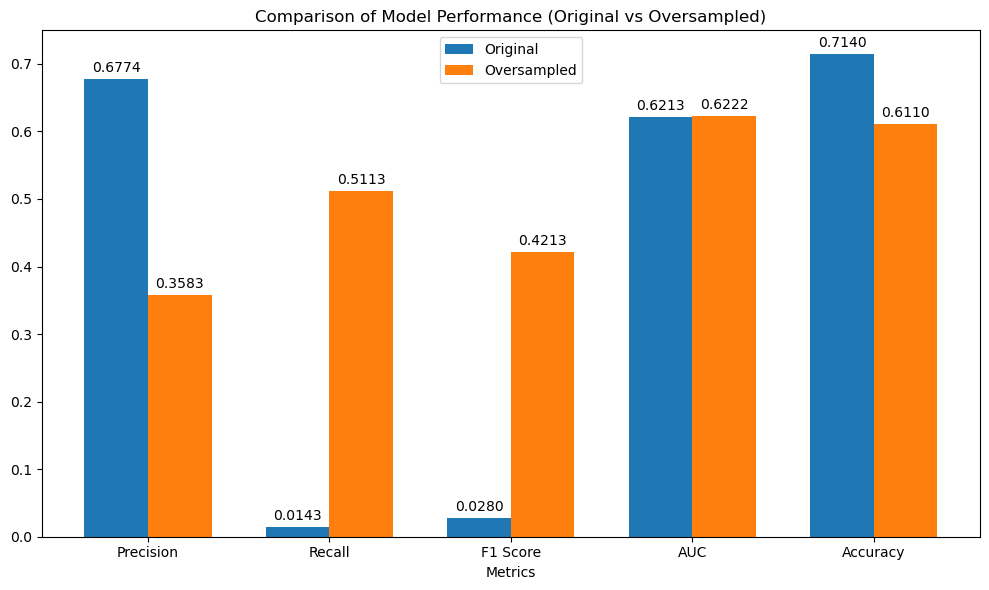

In [348]:
import matplotlib.pyplot as plt
import numpy as np

# 두 개의 모델(오버샘플링 전후)의 성능 지표
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']
original_scores = [precision, recall, f1, auc, acc]  # 오버샘플링 전 성능 지표
oversampled_scores = [precision_os, recall_os, f1_os, auc_os, acc_os]  # 오버샘플링 후 성능 지표

# 막대 그래프 그리기
x = np.arange(len(metrics))  # 지표 개수만큼 x 축 좌표
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_scores, width, label='Original')
rects2 = ax.bar(x + width/2, oversampled_scores, width, label='Oversampled')

# 그래프 레이블 설정
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Model Performance (Original vs Oversampled)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# 막대 위에 값 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


- 결과 & 결론
    - 논문에 나온 그대로 따라하려고 노력했지만 재현되지 않음.
    - 오버샘플링은 Accuracy,Precision 에서 감소하였지만 Recall, F1 Score 에서 크게 증가함.
    - Precision 감소량에 비해 Recall 값이 크게 증가하여 F1 Score 증가함.
    - Recall = TP / (NP + FN) : 이탈자(1) 중 모델이 이탈자라고 올바르게 예측한 비율로 이탈자를 예측을 목적으로 한 경우, 유의미한 성능향상을 보임.
    